In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("movimientos_bancarios.csv")
display(df.head())



meses = {
    "ene": "01", "feb": "02", "mar": "03", "abr": "04",
    "may": "05", "jun": "06", "jul": "07", "ago": "08",
    "sep": "09", "oct": "10", "nov": "11", "dic": "12"
}

df_fecha =df.copy()
# Cambio de abreviatura por número:
for esp, num in meses.items():
    df_fecha["Fecha_operacion"] = df_fecha["Fecha_operacion"].str.replace(esp,num, regex=False)

# Unirlo todo en formato reconocible para pandas (día, mes, año)
# Ej: "22 04 2025" lo transformamos a "22/04/2025"
df_fecha["Fecha_operacion"] = df_fecha["Fecha_operacion"].str.replace(" ", "/", n=2, regex=False)

# Convertimos ahora a datetime
df_fecha["Fecha_operacion"] = pd.to_datetime(df_fecha["Fecha_operacion"], format="%d/%m/%Y", errors="coerce")

#Comprobar que el cambio está bien realizado
df_fecha.info()
print(df_fecha["Fecha_operacion"].head())
df_fecha.sample()

df_fecha.loc[len(df_fecha)] = ['2025-03-31', 'Prestamo', 197.19, None]
df_fecha['Fecha_operacion'] = pd.to_datetime(df_fecha['Fecha_operacion'])  # asegurar formato datetime

df_fecha[df_fecha['Fecha_operacion'] == '2025-03-31']

# df_fecha.to_csv("Movimientos_fecha_corregida.csv", index=False)



1.26.4


,Fecha_operacion,Operacion,Importe,Saldo
0,22 abr 2025,Transferencia Inmediata De Evelymar Bastidas R...,15.0,840.16
1,22 abr 2025,Transferencia Inmediata De Evelymar Bastidas R...,75.0,825.16
2,22 abr 2025,Transferencia Inmediata De Evelymar Bastidas R...,300.0,750.16
3,21 abr 2025,"Pago Movil En Heladeria Quint, Jinamar, Tarj. ...",-10.6,450.16
4,21 abr 2025,Bizum A Favor De Ruth Santana Gonzalez Concept...,-10.0,460.76


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Fecha_operacion  1535 non-null   datetime64[ns]
 1   Operacion        1535 non-null   object        
 2   Importe          1535 non-null   float64       
 3   Saldo            1535 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 48.1+ KB
0   2025-04-22
1   2025-04-22
2   2025-04-22
3   2025-04-21
4   2025-04-21
Name: Fecha_operacion, dtype: datetime64[ns]


C:\Users\Gamer\AppData\Local\Temp\ipykernel_33188\4215539545.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_fecha.loc[len(df_fecha)] = ['2025-03-31', 'Prestamo', 197.19, None]


,Fecha_operacion,Operacion,Importe,Saldo
37,2025-03-31,"Compra Playstation Network, Hilversum, Tarjeta...",-13.99,1833.50
38,2025-03-31,Bizum De Debora Vega Ravelo Concepto Todo Saldado,160.00,1847.49
39,2025-03-31,"Pago Movil En The Barber Dog, La Mareta, Tarj....",-69.07,1687.49
40,2025-03-31,"Pago Movil En Panera, Valsequillo, Tarj. :*179057",-8.95,1756.56
41,2025-03-31,"Pago Movil En Lidl Can-gc-tel, Llanos De La, T...",-54.92,1765.51
42,2025-03-31,"Pago Movil En Hd Melenara, Telde, Tarj. :*179057",-59.30,1820.43
43,2025-03-31,"Pago Movil En Picoteo S. Migu, Telde, Tarj. :*...",-18.40,1879.73
1535,2025-03-31,Prestamo,197.19,NaN


In [ ]:
df_fecha.loc[len(df_fecha)] = ['2025-03-31', 'Prestamo', 197.19, None]
df_fecha['Fecha_operacion'] = pd.to_datetime(df_fecha['Fecha_operacion'])  # asegurar formato datetime

df_fecha[df_fecha['Fecha_operacion'] == '2025-03-31']


C:\Users\Gamer\AppData\Local\Temp\ipykernel_33188\1153298606.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_fecha.loc[len(df_fecha)] = ['2025-03-31', 'Ingreso manual', 197.19, None]


,Fecha_operacion,Operacion,Importe,Saldo
37,2025-03-31,"Compra Playstation Network, Hilversum, Tarjeta...",-13.99,1833.50
38,2025-03-31,Bizum De Debora Vega Ravelo Concepto Todo Saldado,160.00,1847.49
39,2025-03-31,"Pago Movil En The Barber Dog, La Mareta, Tarj....",-69.07,1687.49
40,2025-03-31,"Pago Movil En Panera, Valsequillo, Tarj. :*179057",-8.95,1756.56
41,2025-03-31,"Pago Movil En Lidl Can-gc-tel, Llanos De La, T...",-54.92,1765.51
42,2025-03-31,"Pago Movil En Hd Melenara, Telde, Tarj. :*179057",-59.30,1820.43
43,2025-03-31,"Pago Movil En Picoteo S. Migu, Telde, Tarj. :*...",-18.40,1879.73
1535,2025-03-31,Prestamo,197.19,NaN
1536,2025-03-31,Ingreso manual,197.19,NaN


In [3]:
# Unir los CSV
df_1 = pd.read_csv('movimientos_bancarios_extraidos.csv')
df_2 = pd.read_csv('Movimientos_fecha_corregida.csv')

df_unido = pd.concat([df_1, df_2], ignore_index=True)


# Convertimos ahora a datetime
df_unido['Fecha_operacion'] = pd.to_datetime(df_unido['Fecha_operacion'], format='%Y-%m-%d', errors='coerce')


display(df_unido.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Fecha_operacion  2362 non-null   datetime64[ns]
 1   Operacion        2362 non-null   object        
 2   Importe          2362 non-null   float64       
 3   Saldo            1847 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 73.9+ KB


None

In [4]:
# Corregimos nombres de las columnas
df_unido.columns = df_fecha.columns.str.lower().str.replace(" ", "_")
display(df_unido.head())


,fecha_operacion,operacion,importe,saldo
0,2021-09-23,TRANSFERENCIA DE EVELYMAR ESPERANZA BASTIDAS R...,175.0,NaN
1,2021-09-23,TRANSFERENCIA DE EVELYMAR ESPERANZA BASTIDAS R...,123.6,NaN
2,2021-09-23,TRANSFERENCIA DE EVELYMAR ESPERANZA BASTIDAS R...,55.0,NaN
3,2021-09-23,TRANSFERENCIA DE EVELYMAR ESPERANZA BASTIDAS R...,50.0,403.6
4,2021-09-24,"COMPRA PAGO M:VIL EN BURGER KING TOM, PALMAS (...",-9.0,NaN


In [5]:
def limpiar_texto(texto):
    texto = str(texto).lower()
    texto = re.sub(r'https?://\S+', '', texto)                  # quitar URLs
    texto = re.sub(r'[\d]+', '', texto)                         # quitar números
    texto = re.sub(r'[\*\.,:;/\-_"\'\(\)]+', ' ', texto)        # quitar símbolos comunes
    texto = re.sub(r'\s+', ' ', texto).strip()                  # quitar espacios repetidos
    return texto

df_unido['operacion_limpia'] = df_unido['operacion'].apply(limpiar_texto)
display(df_unido.sample(10))

,fecha_operacion,operacion,importe,saldo,operacion_limpia
791,2023-04-10,"TRANSFERENCIA DE Evelymar Bastidas Rosario, CO...",100.00,216.31,transferencia de evelymar bastidas rosario con...
1985,2023-11-20,"Pago Movil En Disa Valsequill, Valsequillo (, ...",-5.50,184.68,pago movil en disa valsequill valsequillo tarj
1105,2024-11-18,Bizum A Favor De Ruth Santana Gonzalez Concept...,-90.50,634.64,bizum a favor de ruth santana gonzalez concept...
980,2025-01-13,"Pago Movil En Lidl Can-gc-tel, Telde, Tarj. :*...",-31.37,1348.39,pago movil en lidl can gc tel telde tarj
197,2022-02-16,"PAGO MOVIL EN INSIDE LAS PALM, LAS PALMAS, TAR...",-46.96,223.91,pago movil en inside las palm las palmas tarj
211,2022-03-01,"REINTEGRO, ATM:00490520, VALSEQUILLO, TARJ. :*...",-10.00,NaN,reintegro atm valsequillo tarj
783,2023-04-10,"PAGO MOVIL EN LAIBA DONER KEB, TELDE, TARJ. :*...",-8.60,NaN,pago movil en laiba doner keb telde tarj
1022,2024-12-23,"Pago Movil En Momenti Cc Las, Telde, Tarj. :*1...",-1.50,387.20,pago movil en momenti cc las telde tarj
1724,2024-02-15,"Pago Movil En Chiwawa Venegas, Las Palmas, Tar...",-24.90,1040.27,pago movil en chiwawa venegas las palmas tarj
1571,2024-04-08,"Compra Playstation Network, Hilversum, Tarjeta...",-1.99,491.63,compra playstation network hilversum tarjeta c...


In [6]:
df_unido["tipo"] = df_unido["importe"].apply(lambda i: "ingreso" if i > 0 else "gasto")
display(df_unido.sample(3))


,fecha_operacion,operacion,importe,saldo,operacion_limpia,tipo
739,2023-03-04,"COMPRA APPLE.COM/BILL, 900812703, TARJETA 5163...",-1.19,NaN,compra apple com bill tarjeta comision,gasto
1872,2023-12-21,"Compra Internet En Artesiete Las T, Hornos Del...",-16.60,196.01,compra internet en artesiete las t hornos del ...,gasto
548,2022-11-07,"PAGO MOVIL EN SUPERMERCDO LOP, VALSEQUILLO (, ...",-9.83,NaN,pago movil en supermercdo lop valsequillo tarj,gasto


In [7]:
df_unido["año_mes"] = df_unido["fecha_operacion"].dt.to_period("M").astype(str)
display(df_unido.sample(5))
df_unido.info()

,fecha_operacion,operacion,importe,saldo,operacion_limpia,tipo,año_mes
1772,2024-01-30,Bizum A Favor De Debora Vega Ravelo Concepto: ...,-20.00,1121.06,bizum a favor de debora vega ravelo concepto p...,gasto,2024-01
1616,2024-03-22,"Pago Movil En Conforama Tamar, Palmas (las), T...",-222.30,210.16,pago movil en conforama tamar palmas las tarj,gasto,2024-03
1360,2024-07-01,"Compra C.woellhaf Gastroserv., Koeln, Tarjeta ...",-8.50,942.05,compra c woellhaf gastroserv koeln tarjeta com...,gasto,2024-07
1734,2024-02-12,"Pago Movil En Lidl Can-gc-tel, Telde, Tarj. :*...",-44.93,623.31,pago movil en lidl can gc tel telde tarj,gasto,2024-02
23,2021-10-08,"COMPRA PAGO M:VIL EN TACO BELL LAS A, LAS PALM...",-5.00,NaN,compra pago m vil en taco bell las a las palma...,gasto,2021-10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha_operacion   2362 non-null   datetime64[ns]
 1   operacion         2362 non-null   object        
 2   importe           2362 non-null   float64       
 3   saldo             1847 non-null   float64       
 4   operacion_limpia  2362 non-null   object        
 5   tipo              2362 non-null   object        
 6   año_mes           2362 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 129.3+ KB


In [8]:
df_unido.columns

Index(['fecha_operacion', 'operacion', 'importe', 'saldo', 'operacion_limpia',
       'tipo', 'año_mes'],
      dtype='object')

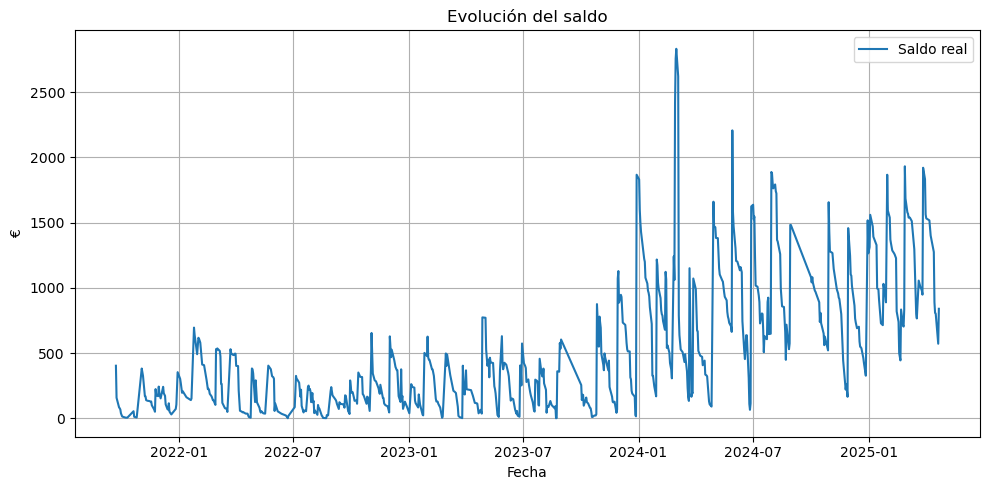

In [9]:
df_plot = df_unido.dropna(subset=["fecha_operacion", "saldo"])
df_plot = df_plot.sort_values("fecha_operacion")

# Agrupar por día y quedarte con el último saldo del día
df_diario = df_plot.groupby("fecha_operacion").last().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_diario["fecha_operacion"], df_diario["saldo"], label="Saldo real")
plt.legend()
plt.title("Evolución del saldo")
plt.xlabel("Fecha")
plt.ylabel("€")
plt.grid(True)
plt.tight_layout()
plt.show()

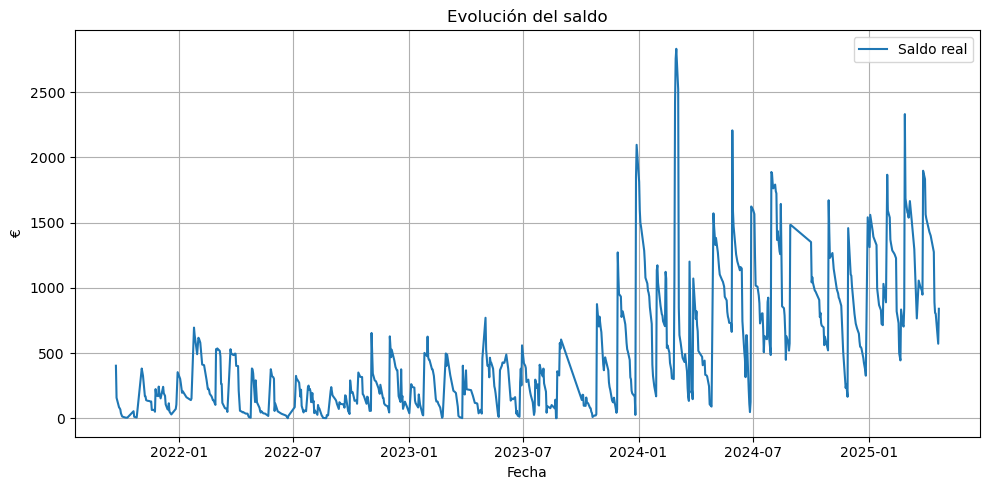

fecha_operacion                                   2024-03-01 00:00:00
operacion           Bizum De Eduardo Jesus Vega Cabello Concepto B...
importe                                                         99.06
saldo                                                         2856.17
operacion_limpia    bizum de eduardo jesus vega cabello concepto b...
tipo                                                          ingreso
año_mes                                                       2024-03
Name: 1688, dtype: object

In [10]:
# quitamos el valor atípico del saldo

# Lo ubicamos
df_unido.loc[df_unido['saldo'].idxmax()]

# Lo eliminamos
df_unido = df_unido[df_unido['fecha_operacion'] != '2024-08-09']
df_plot = df_plot.sort_values("fecha_operacion")

# Agrupar por día y quedarte con el último saldo del día
df_diario = df_plot.groupby("fecha_operacion").last().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_diario["fecha_operacion"], df_diario["saldo"], label="Saldo real")
plt.legend()
plt.title("Evolución del saldo")
plt.xlabel("Fecha")
plt.ylabel("€")
plt.grid(True)
plt.tight_layout()
plt.show()

df_unido.loc[df_unido['saldo'].idxmax()]


In [11]:
# Como ya no necesitamos la columna saldo, la eliminamos
df_unido = df_unido.drop(columns=["saldo"])

In [12]:
# lo guardamos en un nuevo CSV para trabajar sobre el nuevo formato datetime
df_unido.to_csv("Movimientos_limpios.csv", index=False)
df_verificacion = pd.read_csv("Movimientos_limpios.csv", parse_dates=['fecha_operacion'])
display(df_verificacion.sample(10))

,fecha_operacion,operacion,importe,operacion_limpia,tipo,año_mes
31,2021-10-22,"COMPRA PAGO M:VIL EN PETROPRIX SEDE, MARTOS, T...",-24.00,compra pago m vil en petroprix sede martos tarj,gasto,2021-10
1004,2024-12-30,"Pago Movil En Picoteo S. Migu, Telde, Tarj. :*...",-7.92,pago movil en picoteo s migu telde tarj,gasto,2024-12
273,2022-04-18,"TRANSACCION CONTACTLESS EN E.S. CIDELMAR, LAS ...",-11.22,transaccion contactless en e s cidelmar las pa...,gasto,2022-04
68,2021-11-23,"TRANSFERENCIA DE CLAUDIA CALDERIN POSTIGO, CON...",4.80,transferencia de claudia calderin postigo conc...,ingreso,2021-11
693,2023-02-05,"PAGO MOVIL EN POKE POKE LAS A, LAS PALMAS, TAR...",-12.95,pago movil en poke poke las a las palmas tarj,gasto,2023-02
118,2021-12-18,"TRANSACCION CONTACTLESS EN EN 1 PLIS PLAS, TEL...",-6.90,transaccion contactless en en plis plas telde ...,gasto,2021-12
640,2022-12-30,"PAGO MOVIL EN ILUSIONA LAS PA, PALMAS (LAS), T...",-1.00,pago movil en ilusiona las pa palmas las tarj,gasto,2022-12
1358,2024-07-01,Recibo Sanitas S A De Seguros Nº Recibo 0049 6...,-74.38,recibo sanitas s a de seguros nº recibo bbfvrm...,gasto,2024-07
1404,2024-06-18,Bizum De Eduardo Jesus Vega Cabello Concepto V...,68.50,bizum de eduardo jesus vega cabello concepto v...,ingreso,2024-06
2274,2023-06-12,"Pago Movil En Academia Univer, Palmas, Tarj. :...",-94.50,pago movil en academia univer palmas tarj,gasto,2023-06


In [13]:
df_verificacion.isnull().sum()

fecha_operacion     0
operacion           0
importe             0
operacion_limpia    0
tipo                0
año_mes             0
dtype: int64

In [14]:
df_categorias = df_verificacion.copy()

In [15]:
# def clasificar_por_reglas(texto):
#     texto = str(texto).lower()

#     #Ingresos
#     if any(p in texto for p in ['transferencia inmediata de', 'transferencia de', 'transferencia recibida']):
#         return 'Ingreso'

    
#     if 'bizum de' in texto:
#         return 'Ingreso'
    
#     # Gastos

#     # Facturas
#     if 'recibo' in texto:
#         return 'Facturas'
    
#     # Préstamos
#     if 'liquidacion periodica' in texto:
#         return 'Prestamo'
    
#     # Transporte
#     gasolina = ['repsol', 'cepsa', 'bp', 'shell', 'gasolinera', 'disa']
#     if any (g in texto for g in gasolina):
#         return 'Transporte'
    
#     if 'guaguas' in texto or 'salcai' in texto or 'global' in texto:
#         return 'Transporte'
    
#     # Restauración
#     restaurantes = ['la sureña', 'goiko', 'vips','heladeria', 'picoteo', 'mc donald', 'burguer king', 'los charcones', 'quinta cumbre', 'bk', 'camaleon', 'tagliatella', 'bar', 'cafeteria', 'food', 'tb metropo', 'compra uber']
#     if any(r in texto for r in restaurantes):
#         return 'Restauracion'
    
#     # Supermercado
#     supermercado = ['mercadona', 'aldi', 'lidl', 'hiperdino', 'carrefour']
#     if any(s in texto for s in supermercado):
#         return 'Supermercado'
    
#     # Cuentas pagadas
#     if 'bizum a' in texto or 'transferencia a' in texto:
#         return 'Transferencia personal'
    
#     # Ocio y suscripciones
#     ocio = ['netflix', 'spotify', 'hbo', 'disney+', 'disney plus', 'amazon prime', 'filmin', 'nintendo', 'game pass']
#     if any(o in texto for o in ocio):
#         return 'Suscripciones'
    
#     # Compras no esenciales
#     compras_no_esenciales = ['mediamarkt', 'media markt', 'fnac', 'ikea', 'leroy merlin', 'decathlon', 'zara', 'shein', 'aliexpress', 'pull&bear', 'stradivarius', 'amazon']
#     if any(c in texto for c in compras_no_esenciales):
#         return 'Compras no esenciales'

#     return 'Sin categorizar'





In [16]:
def clasificar_por_reglas(texto):
    texto = str(texto).lower()

    # Ingresos
    if any(p in texto for p in ['transferencia inmediata de', 'transferencia de', 'transferencia recibida', 'reintegro']):
        return 'Ingreso'
    if 'bizum de' in texto:
        return 'Ingreso'

    # Cuentas pagadas / personales
    if 'bizum a' in texto or 'transferencia a' in texto or 'traspaso' in texto:
        return 'Transferencia personal'
    
    # Facturas
    if 'recibo' in texto or 'academia' in texto or 'univ' in texto:
        return 'Facturas'

    # Préstamos
    if 'liquidacion periodica' in texto:
        return 'Préstamo'
    
    # Compras no esenciales
    compras_no_esenciales = [
        'mediamarkt', 'media markt', 'fnac','ikea', 'leroy merlin', 'decathlon',
        'zara', 'shein', 'aliexpress', 'pull&bear', 'stradivarius', 'amazon', 'playstation',
        'viveros', 'zara home', 'idea market', 'playstation', 'tabaco', 'kiwoko',
        'primor', 'agroquimica', 'druni','kiwoko'
    ]
    if any(c in texto for c in compras_no_esenciales):
        return 'Compras no esenciales'

    # Restauración
    restaurantes = [
        'la sureña', 'goiko', 'vips', 'heladeria','pizza', 'hamburguesa','heladería', 'picoteo',
        'mcdonald', 'mc donald', 'burger king', 'burguer king', 'los charcones',
        'quinta cumbre', 'bk', 'camaleon', 'tagliatella', 'bar', 'cafeteria',
        'cafetería', 'food', 'tb metropo', 'compra uber', "llaollao", "compra sumup",
        'pasteleria', 'poke','las casitas', 'gelato', 'cantina', 'nothing', 'oakberry', 'restaurante'
    ]
    if any(r in texto for r in restaurantes):
        return 'Restauración'
    
    # Veterinario
    if 'el corral' in texto:
        return 'Facturas'

    # Supermercado
    supermercado = ['mercadona', 'aldi', 'lidl', 'hiperdino', 'carrefour', 'alcampo', 'farmacia']
    if any(s in texto for s in supermercado):
        return 'Supermercado'

    # Suscripciones / ocio
    ocio = ['netflix', 'spotify', 'hbo', 'disney+', 'disney plus', 'amazon prime', 'filmin', 'nintendo', 'game pass', 'cine', 'artesiete', 'apple com']
    if any(o in texto for o in ocio):
        return 'Ocio / Suscripciones'

    
    # Transporte público
    if any(p in texto for p in ['guaguas', 'salcai', 'global']):
        return 'Transporte'

    # Transporte privado / gasolina
    gasolina = ['repsol', 'cepsa', 'bp', 'shell', 'gasolinera', 'disa', 'parking', 'motor telde', 'coche', 'rueda', 'gasolina', 'petroprix']
    if any(g in texto for g in gasolina):
        return 'Transporte'


    return 'Sin categorizar'

df_categorias["categoria"] = df_categorias["operacion_limpia"].apply(clasificar_por_reglas)
display(df_categorias[df_categorias["categoria"] == "Sin categorizar"])

,fecha_operacion,operacion,importe,operacion_limpia,tipo,año_mes,categoria
9,2021-09-25,"COMPRA PAGO M:VIL EN MCDONAL TRIANA, PALMAS (L...",-6.50,compra pago m vil en mcdonal triana palmas las...,gasto,2021-09,Sin categorizar
11,2021-09-26,"COMPRA PAGO M:VIL EN SPAR AMADORES, PUERTO RIC...",-4.77,compra pago m vil en spar amadores puerto rico...,gasto,2021-09,Sin categorizar
17,2021-09-28,"TRANSACCION CONTACTLESS EN HD C.C. ALISIOS, PA...",-1.99,transaccion contactless en hd c c alisios palm...,gasto,2021-09,Sin categorizar
19,2021-09-30,"COMPRA Altafit Vegueta GC, Las Palmas de, TARJ...",-9.90,compra altafit vegueta gc las palmas de tarjet...,gasto,2021-09,Sin categorizar
21,2021-10-04,"COMPRA PAGO M:VIL EN TACO BELL LAS A, LAS PALM...",-3.95,compra pago m vil en taco bell las a las palma...,gasto,2021-10,Sin categorizar
...,...,...,...,...,...,...,...
2322,2023-05-15,"Pago Movil En Minimarket La X, Las Palmas, Tar...",-0.85,pago movil en minimarket la x las palmas tarj,gasto,2023-05,Sin categorizar
2329,2023-05-11,"Pago Movil En Punto Coma, Palmas (las), Tarj. ...",-2.55,pago movil en punto coma palmas las tarj,gasto,2023-05,Sin categorizar
2335,2023-05-08,"Pago Movil En Shalom Restaura, Teror, Tarj. :*...",-7.90,pago movil en shalom restaura teror tarj,gasto,2023-05,Sin categorizar
2338,2023-05-08,"Pago Movil En Hd Melenara, Telde, Tarj. :*585729",-75.88,pago movil en hd melenara telde tarj,gasto,2023-05,Sin categorizar


In [17]:
# 1 Preparar los datos
df_etiquetado = df_categorias[df_categorias['categoria'] != 'Sin categorizar'].copy()
display(df_etiquetado.sample(10))

,fecha_operacion,operacion,importe,operacion_limpia,tipo,año_mes,categoria
2193,2023-07-25,Bizum De Debora Vega Ravelo Concepto .,11.20,bizum de debora vega ravelo concepto,ingreso,2023-07,Ingreso
2331,2023-05-10,Bizum De Ana Maria Ylla Pallares Concepto Botas,150.11,bizum de ana maria ylla pallares concepto botas,ingreso,2023-05,Ingreso
365,2022-07-14,"COMPRA INTERNET EN REPSOL WAYLET, MADRID, TARJ...",-32.59,compra internet en repsol waylet madrid tarj,gasto,2022-07,Transporte
1260,2024-08-12,Bizum De Debora Vega Ravelo Concepto Compra. T...,80.00,bizum de debora vega ravelo concepto compra ta...,ingreso,2024-08,Ingreso
374,2022-07-16,"TRANSACCION CONTACTLESS EN CANTINA EL BUEN, VA...",-29.20,transaccion contactless en cantina el buen val...,gasto,2022-07,Restauración
1068,2024-12-02,"Pago Movil En Lidl Can-gc-tel, Telde, Tarj. :*...",-42.19,pago movil en lidl can gc tel telde tarj,gasto,2024-12,Supermercado
623,2022-12-22,"PAGO MOVIL EN SPAR LA BARRERA, VALSEQUILLO (, ...",-24.80,pago movil en spar la barrera valsequillo tarj,gasto,2022-12,Restauración
391,2022-07-28,TRANSFERENCIA A FAVOR DE ZEN:N CONCEPTO: COMIDA,-10.50,transferencia a favor de zen n concepto comida,gasto,2022-07,Transferencia personal
955,2025-01-28,"Compra Apple.com/bill, 900812703, Tarjeta 5489...",-22.99,compra apple com bill tarjeta comision,gasto,2025-01,Ocio / Suscripciones
1871,2023-12-20,"Compra Internet En Repsol Waylet, Madrid, Tarj...",-47.20,compra internet en repsol waylet madrid tarj,gasto,2023-12,Transporte


In [18]:
# 2 Separar texto y etiquetas
x_texto = df_etiquetado['operacion_limpia']
y_etiqueta = df_etiquetado['categoria']

In [19]:
# 2. Guardar los textos en una lista para revisarlos luego
textos_originales = x_texto.tolist()

In [20]:
#3 Vectorizar el texto con TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_vect = vectorizer.fit_transform(x_texto)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, x_text_train, x_text_test = train_test_split(
    X_vect, y_etiqueta, textos_originales, test_size=0.2, random_state=42
)


In [22]:
from sklearn.ensemble import RandomForestClassifier

modelo= RandomForestClassifier()
modelo.fit(x_train, y_train)

RandomForestClassifier()

Accuracy 0.9778481012658228
Reporte de clasificación:
                        precision    recall  f1-score   support

 Compras no esenciales       1.00      0.83      0.91        24
              Facturas       1.00      1.00      1.00        30
               Ingreso       1.00      1.00      1.00        58
  Ocio / Suscripciones       1.00      1.00      1.00        29
              Préstamo       1.00      1.00      1.00         4
          Restauración       0.88      1.00      0.94        53
          Supermercado       1.00      0.93      0.96        27
Transferencia personal       1.00      1.00      1.00        54
            Transporte       1.00      0.97      0.99        37

              accuracy                           0.98       316
             macro avg       0.99      0.97      0.98       316
          weighted avg       0.98      0.98      0.98       316



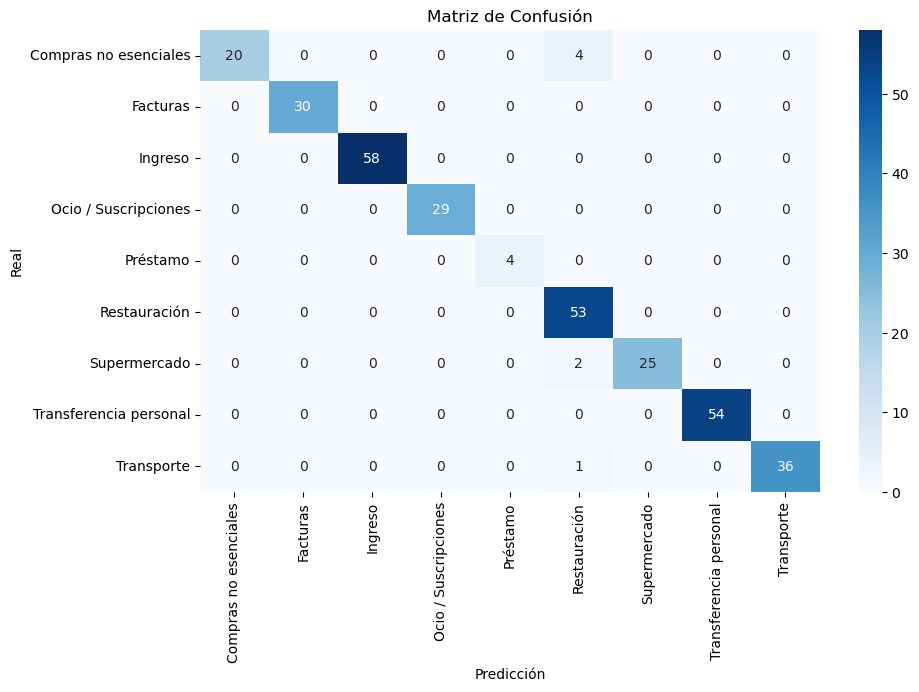

,texto,real,predicho
12,pago movil en druni s a palmas de gra tarj,Compras no esenciales,Restauración
40,pago movil en lefties zara rd telde tarj,Compras no esenciales,Restauración
81,pago movil en parking palmas de gra tarj,Transporte,Restauración
135,pago movil en kiwoko alisios toscon bajo tarj,Compras no esenciales,Restauración
173,transaccion contactless en carrefour lpalm pal...,Supermercado,Restauración
271,pago movil en farmacia clara valsequillo tarj,Supermercado,Restauración
285,pago movil en idea market telde tarj,Compras no esenciales,Restauración


In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predice sobre el conjunto de prueba
y_pred = modelo.predict(x_test)

# Exactitud global
print('Accuracy', accuracy_score(y_test, y_pred))

# Informe por clase
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

# Matriz de confusión 
import seaborn as sns 

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=modelo.classes_, yticklabels=modelo.classes_, cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# 7. Revisar predicciones incorrectas
errores = pd.DataFrame({
    'texto': x_text_test,
    'real': y_test.values,
    'predicho': y_pred
})
errores = errores[errores['real'] != errores['predicho']]

# Mostrar errores
display(errores.head(15))

In [24]:
# Seleccionar solo los movimientos sin categoría
df_sin_etiquetar = df_categorias[df_categorias['categoria'] == 'Sin categorizar'].copy()


In [25]:
# Vectorizar esos nuevos textos con el vectorizer que ya tienes
x_nuevos = vectorizer.transform(df_sin_etiquetar['operacion_limpia'])

In [26]:
# predecir las categorías
df_sin_etiquetar['categoria_predicha'] = modelo.predict(x_nuevos)

In [27]:
# Ver los resultados
display(df_sin_etiquetar[['operacion_limpia', 'categoria_predicha']].sample(55))
df_sin_etiquetar.info()
df_sin_etiquetar[df_sin_etiquetar['categoria'] == 'Sin categorizar'].shape[0]



,operacion_limpia,categoria_predicha
85,compra pago m vil en taco bell las a las palma...,Restauración
561,pago movil en minimarket la x las palmas tarj,Compras no esenciales
1739,pago movil en bazar valsequil valsequillo tarj,Supermercado
1112,pago movil en sagulpa elder las palmas tarj,Compras no esenciales
690,pago movil en las palmas tarj,Compras no esenciales
921,pago movil en hd melenara telde tarj,Supermercado
352,transaccion contactless en la taramela valsequ...,Restauración
383,pago movil en felix fumero s gran tarajal tarj,Compras no esenciales
1473,pago movil en hd melenara telde tarj,Supermercado
1902,pago movil en las terrazas tp telde tarj,Supermercado


<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 9 to 2354
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fecha_operacion     778 non-null    datetime64[ns]
 1   operacion           778 non-null    object        
 2   importe             778 non-null    float64       
 3   operacion_limpia    778 non-null    object        
 4   tipo                778 non-null    object        
 5   año_mes             778 non-null    object        
 6   categoria           778 non-null    object        
 7   categoria_predicha  778 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 54.7+ KB


778

In [28]:
# 4. Actualizar el DataFrame original usando índices
df_categorias.loc[df_sin_etiquetar.index, 'categoria'] = df_sin_etiquetar['categoria_predicha'].values

# 5. Añadir columna origen
df_categorias['origen'] = 'manual'
df_categorias.loc[df_sin_etiquetar.index, 'origen'] = 'modelo'
display(df_categorias.sample(15))
df_categorias[df_categorias['categoria'] == 'Sin categorizar'].shape[0]

df_categorias.info()


,fecha_operacion,operacion,importe,operacion_limpia,tipo,año_mes,categoria,origen
69,2021-11-23,"COMPRA PAGO M:VIL EN LAS CASITAS EMP, LAS PALM...",-3.50,compra pago m vil en las casitas emp las palma...,gasto,2021-11,Restauración,manual
748,2023-03-11,BIZUM DE Debora Vega Ravelo CONCEPTO .,37.00,bizum de debora vega ravelo concepto,ingreso,2023-03,Ingreso,manual
374,2022-07-16,"TRANSACCION CONTACTLESS EN CANTINA EL BUEN, VA...",-29.20,transaccion contactless en cantina el buen val...,gasto,2022-07,Restauración,manual
2130,2023-08-21,"Pago Movil En Sd San Mateo, San Mateo, Tarj. :...",-5.97,pago movil en sd san mateo san mateo tarj,gasto,2023-08,Restauración,modelo
271,2022-04-11,"COMPRA APPLE.COM/BILL, ITUNES.COM, TARJETA 516...",-8.99,compra apple com bill itunes com tarjeta comision,gasto,2022-04,Ocio / Suscripciones,manual
395,2022-08-01,"PAGO MOVIL EN MUELLE DEPORTIV, PALMAS DE GRA, ...",-2.30,pago movil en muelle deportiv palmas de gra tarj,gasto,2022-08,Restauración,modelo
1747,2024-02-05,"Compra Internet En Grupo Rockabill, Las Palmas...",-5.00,compra internet en grupo rockabill las palmas ...,gasto,2024-02,Transporte,modelo
2248,2023-06-30,Transferencia De Fundacion Canaria Universidad...,358.65,transferencia de fundacion canaria universidad...,ingreso,2023-06,Ingreso,manual
2225,2023-07-10,"Pago Movil En Agroquimica Jua, Telde, Tarj. :*...",-10.45,pago movil en agroquimica jua telde tarj,gasto,2023-07,Compras no esenciales,manual
2345,2023-04-28,"Pago Movil En Lidl Can-gc-tel, Telde, Tarj. :*...",-11.68,pago movil en lidl can gc tel telde tarj,gasto,2023-04,Supermercado,manual


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355 entries, 0 to 2354
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha_operacion   2355 non-null   datetime64[ns]
 1   operacion         2355 non-null   object        
 2   importe           2355 non-null   float64       
 3   operacion_limpia  2355 non-null   object        
 4   tipo              2355 non-null   object        
 5   año_mes           2355 non-null   object        
 6   categoria         2355 non-null   object        
 7   origen            2355 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 147.3+ KB


In [29]:
# df_categorias.to_csv("Movimientos_categorizados.csv", index=False)

In [30]:
df_categorizado= pd.read_csv('Movimientos_categorizados.csv')
display(df_categorizado.sample(10))

,fecha_operacion,operacion,importe,operacion_limpia,tipo,año_mes,categoria,origen
804,2023-04-24,"PAGO MOVIL EN LIDL CAN-GC-TEL, TELDE, TARJ. :*...",-45.96,pago movil en lidl can gc tel telde tarj,gasto,2023-04,Supermercado,manual
1519,2024-04-29,"Pago Movil En Mercadona Las T, Telde, Tarj. :*...",-12.98,pago movil en mercadona las t telde tarj,gasto,2024-04,Supermercado,manual
1627,2024-03-18,"Pago Movil En Supermercado K3, Maspalomas, Tar...",-6.74,pago movil en supermercado k maspalomas tarj,gasto,2024-03,Compras no esenciales,modelo
634,2022-12-25,"PAGO MOVIL EN ILUSIONA LAS PA, PALMAS (LAS), T...",-1.00,pago movil en ilusiona las pa palmas las tarj,gasto,2022-12,Restauración,modelo
1227,2024-08-22,"Pago Recibo De Ay. Las Palmas Gran Canaria, Re...",-59.40,pago recibo de ay las palmas gran canaria refe...,gasto,2024-08,Facturas,manual
571,2022-11-23,"COMPRA INTERNET EN REPSOL WAYLET, MADRID, TARJ...",-31.77,compra internet en repsol waylet madrid tarj,gasto,2022-11,Transporte,manual
1141,2024-10-30,"Pago Movil En Mercadona Las T, Hornos Del Re, ...",-6.95,pago movil en mercadona las t hornos del re tarj,gasto,2024-10,Supermercado,manual
1836,2023-12-28,"Pago Movil En Floristeria Ela, Almendros, Ur, ...",-5.10,pago movil en floristeria ela almendros ur tarj,gasto,2023-12,Restauración,modelo
251,2022-03-28,"PAGO MOVIL EN LAIBA DONER KEB, TELDE, TARJ. :*...",-13.60,pago movil en laiba doner keb telde tarj,gasto,2022-03,Supermercado,modelo
1567,2024-04-05,"Pago Movil En Motor Telde Sal, Telde, Tarj. :*...",-149.82,pago movil en motor telde sal telde tarj,gasto,2024-04,Transporte,manual


# Prediccion del gasto / ingreso



In [31]:
df_gasto = df_categorizado[df_categorizado['tipo'] == 'gasto'].copy()
df_gasto['importe'] = df_gasto['importe'].abs()
gastos_mensuales = df_gasto.groupby(['año_mes', 'categoria'])['importe'].sum().unstack(fill_value=0)
display(gastos_mensuales)

categoria,Compras no esenciales,Facturas,Ingreso,Ocio / Suscripciones,Préstamo,Restauración,Supermercado,Transferencia personal,Transporte
año_mes,,,,,,,,,
2021-09,51.08,0.00,200.0,4.99,0.00,49.21,0.00,6.00,34.70
2021-10,0.00,0.00,0.0,0.00,0.00,32.95,0.00,29.90,48.45
2021-11,2.45,164.99,0.0,29.41,0.00,67.95,17.90,5.00,165.25
2021-12,12.30,143.04,20.0,4.99,0.00,176.46,155.14,8.05,123.44
2022-01,45.98,143.05,0.0,28.95,0.00,101.77,48.33,0.00,83.37
2022-02,50.76,166.40,0.0,32.55,0.00,94.21,124.59,0.00,98.25
2022-03,800.38,275.14,110.0,13.98,0.00,66.05,80.54,15.50,105.00
2022-04,301.38,275.14,0.0,20.17,0.00,54.57,36.97,5.00,110.47
2022-05,0.50,156.00,0.0,20.17,0.00,96.85,101.91,0.00,57.84


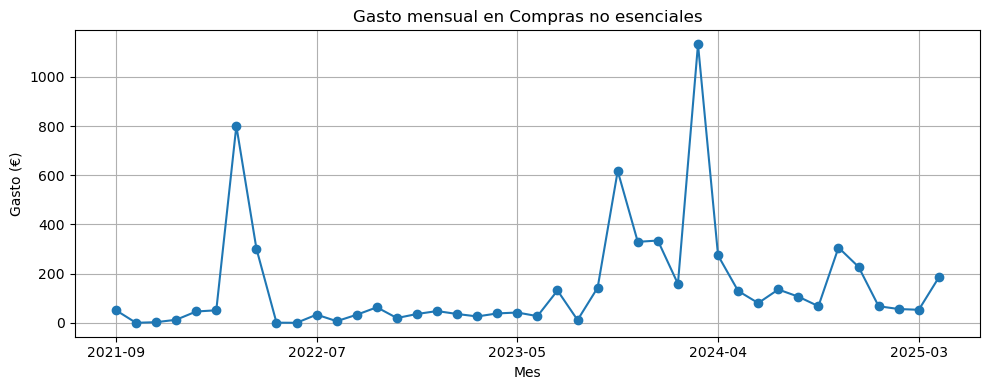

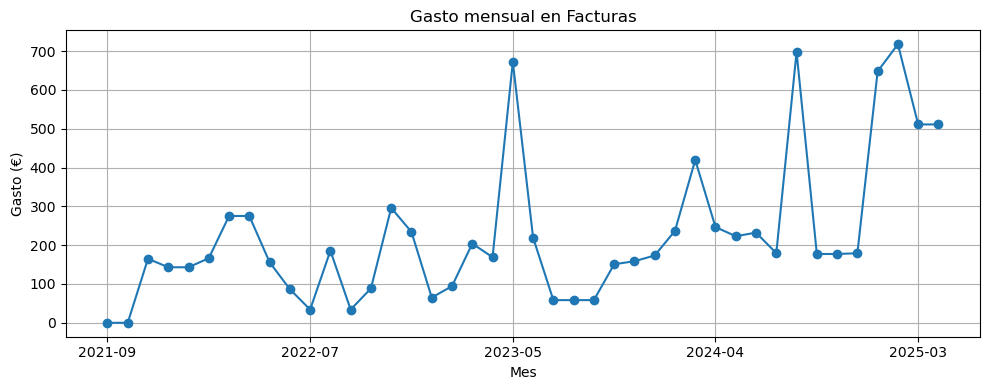

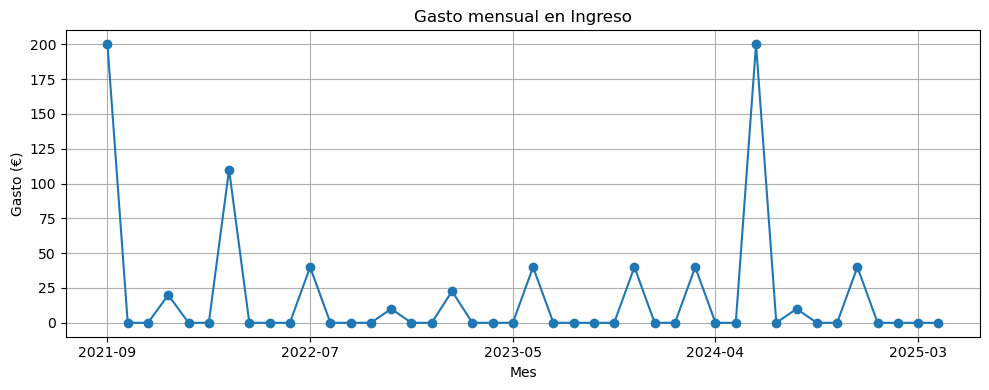

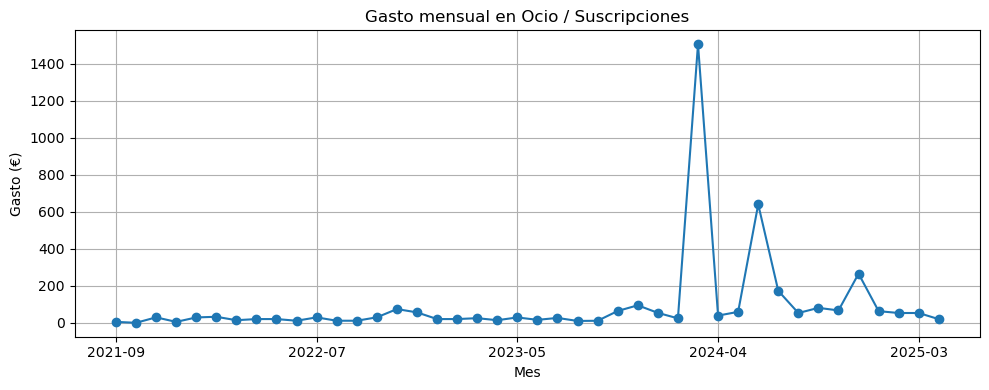

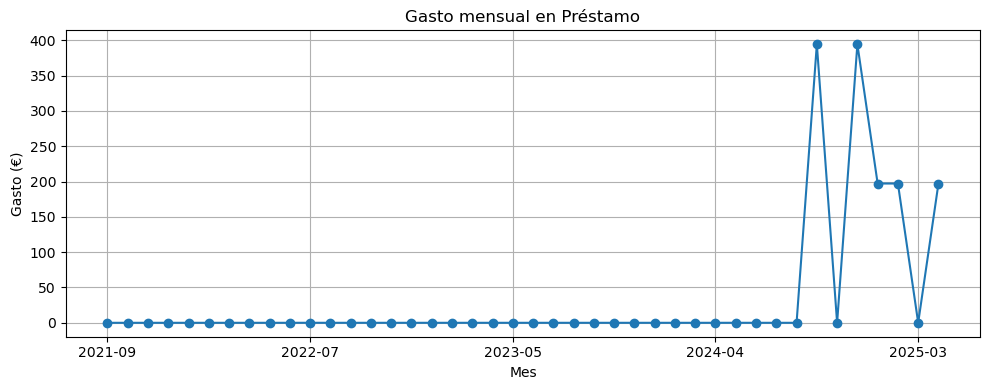

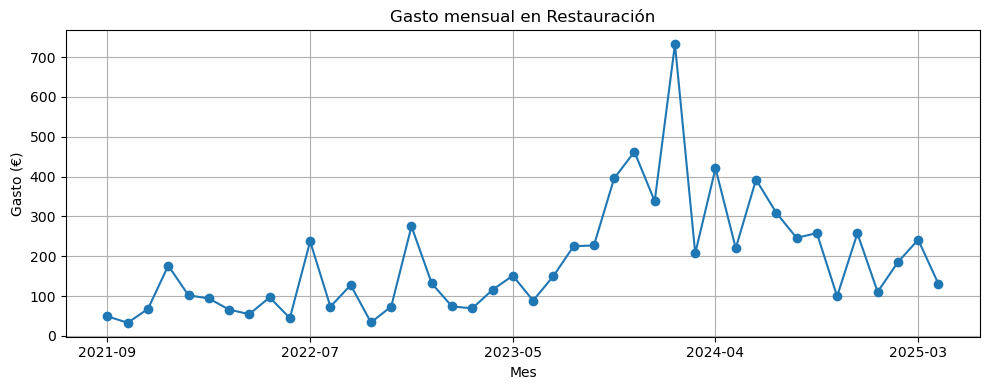

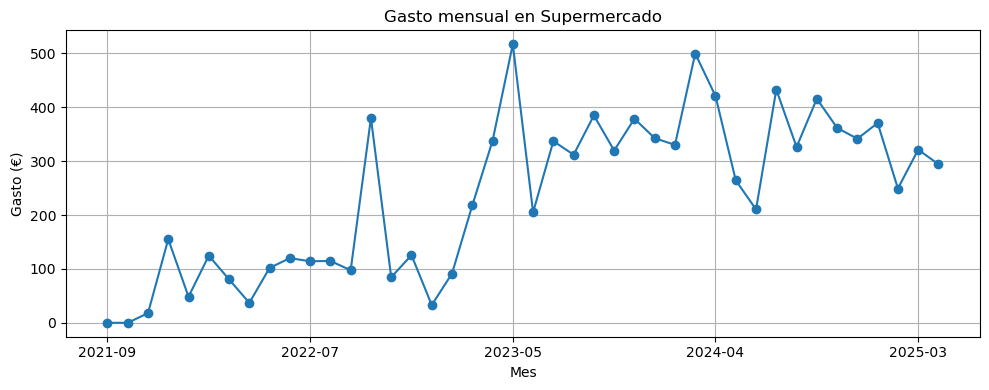

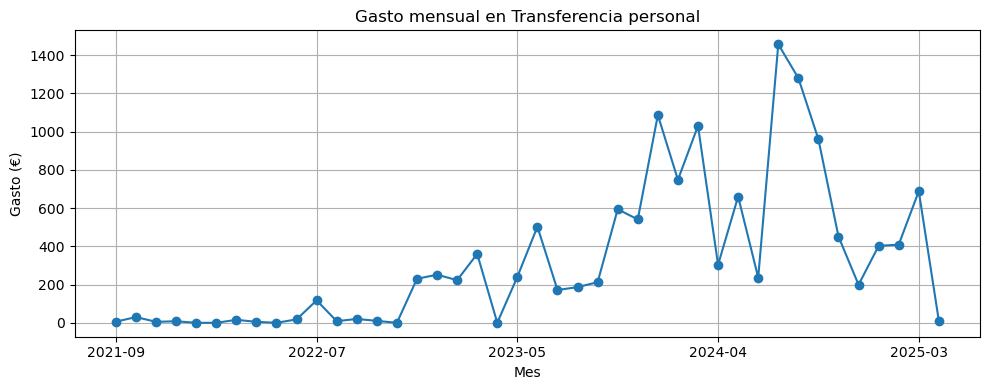

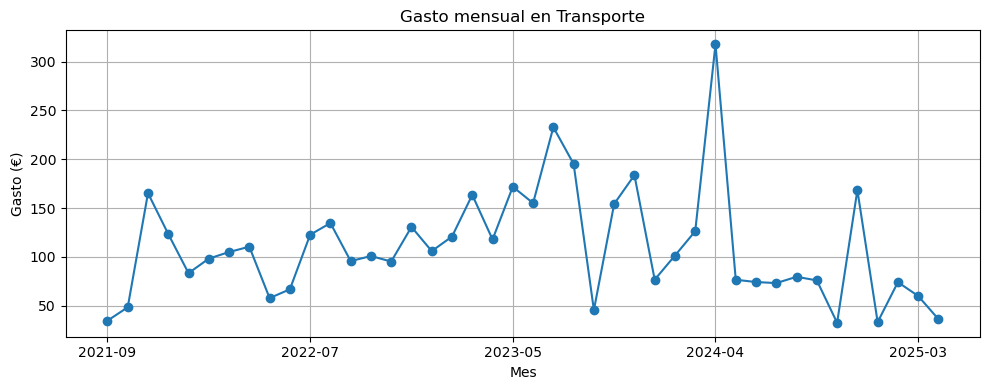

In [32]:
for categoria in gastos_mensuales.columns:
    gastos_mensuales[categoria].plot(
        figsize=(10, 4),
        title=f"Gasto mensual en {categoria}",
        marker='o',
        grid=True
    )
    plt.xlabel("Mes")
    plt.ylabel("Gasto (€)")
    plt.tight_layout()
    plt.show()


In [33]:
# Se usará prophet modelo de Meta para realizar predicciones  de series temporales 
df_gasto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1980 entries, 4 to 2352
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha_operacion   1980 non-null   object 
 1   operacion         1980 non-null   object 
 2   importe           1980 non-null   float64
 3   operacion_limpia  1980 non-null   object 
 4   tipo              1980 non-null   object 
 5   año_mes           1980 non-null   object 
 6   categoria         1980 non-null   object 
 7   origen            1980 non-null   object 
dtypes: float64(1), object(7)
memory usage: 139.2+ KB


In [34]:
# Preparar datos para Prophet para compras no escenciales
from prophet import Prophet
df_prophet = gastos_mensuales['Compras no esenciales'].reset_index()
df_prophet.columns = ['ds','y']
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Se crea y entrena Prophet
modelo_prophet = Prophet()
modelo_prophet.fit(df_prophet)

# Generar fechas futuras y predecir
futuro = modelo_prophet.make_future_dataframe(periods = 6, freq='M')
forecast = modelo_prophet.predict(futuro)

# Mostrar predicciones
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
17:33:20 - cmdstanpy - INFO - Chain [1] start processing
17:33:20 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
0,2021-09-01,103.698603,-92.527058,298.295859
1,2021-10-01,14.410165,-186.144245,219.939743
2,2021-11-01,154.275918,-33.669925,358.738683
3,2021-12-01,97.241235,-111.815737,293.022921
4,2022-01-01,37.509326,-167.251614,235.554194
5,2022-02-01,1.576899,-181.508421,216.678760
6,2022-03-01,356.236240,151.363724,555.178880
7,2022-04-01,158.491226,-48.762558,351.430999
8,2022-05-01,39.927520,-171.426553,236.964141
9,2022-06-01,21.165660,-173.355806,209.238993


In [35]:
# 1. Selección y formateo de la categoría
df_prophet = gastos_mensuales['Compras no esenciales'].reset_index()
df_prophet.columns = ['ds','y']
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
df_prophet['y'] = df_prophet['y'].abs()

# 2. Guardar valores reales de enero a abril de 2025
reales = df_prophet[df_prophet['ds'] > '2024-12-31'][['ds', 'y']]
reales['ds'] = reales['ds'] + pd.offsets.MonthEnd(0)  # para alinear con Prophet

# 3. Filtrar entrenamiento hasta diciembre 2024
# Calcular la mediana sin el valor atípico
mediana = df_prophet[df_prophet['ds'] != '2024-03-01']['y'].median()

# Reemplazar el valor atípico
# df_prophet.loc[df_prophet['ds'] == '2024-03-01', 'y'] = mediana
df_entrenamiento = df_prophet[df_prophet['ds'] <= '2024-12-31'].copy()

# 4. Crear y entrenar el modelo
modelo_prophet = Prophet(
    changepoint_prior_scale=0.01,
    seasonality_mode='additive',
    interval_width=0.95
)
modelo_prophet.fit(df_entrenamiento)


# 5. Predecir 4 meses futuros
futuro = modelo_prophet.make_future_dataframe(periods=5, freq='ME')
forecast = modelo_prophet.predict(futuro)

# 6. Seleccionar predicciones futuras
forecast_test = forecast[forecast['ds'] > '2024-12-31'][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# 7. Comparar con los datos reales
comparacion = pd.merge(forecast_test, reales, on='ds', how='left')
comparacion = comparacion[['ds', 'yhat', 'y','yhat_lower', 'yhat_upper']]
comparacion = comparacion.rename(columns={
    'ds': 'Fecha',
    'yhat': 'Predicción (€)',
    'yhat_lower': 'Límite inferior (€)',
    'yhat_upper': 'Límite superior (€)',
    'y': 'Real (€)'
})

# 8. Mostrar resultados
pd.set_option('display.float_format', '{:,.2f}'.format)
display(comparacion)

from sklearn.metrics import mean_absolute_error

mae_prophet = mean_absolute_error(comparacion['Real (€)'], comparacion['Predicción (€)'])
print(f"✅ MAE Prophet: {mae_prophet:.2f} €")



17:33:20 - cmdstanpy - INFO - Chain [1] start processing
17:33:20 - cmdstanpy - INFO - Chain [1] done processing


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,340.98,67.33,128.08,562.49
1,2025-02-28,-9.53,55.99,-230.51,198.01
2,2025-03-31,509.57,52.89,293.40,737.18
3,2025-04-30,446.01,184.63,217.17,676.71


✅ MAE Prophet: 264.31 €


In [36]:
# from statsmodels.tsa.arima.model import ARIMA
# import pandas as pd
# import numpy as np

# # ========================
# # 1. Preparar la serie
# # ========================

# serie = gastos_mensuales['Compras no esenciales'].copy()

# # Convertir índice a datetime si es str (caso de año_mes tipo '2023-04')
# if not isinstance(serie.index, pd.DatetimeIndex):
#     serie.index = pd.to_datetime(serie.index)

# # Asegurar orden y frecuencia mensual
# serie = serie.sort_index()
# serie = serie.asfreq('MS')  # frecuencia mensual start of month

# # ===============================
# # 2. Reemplazar el valor atípico (2024-03-01) por la mediana
# # ===============================
# mediana = serie[serie.index != '2024-03-01'].median()
# serie.loc['2024-03-01'] = mediana

# # ========================
# # 2. Entrenar con datos hasta dic 2024
# # ========================
# serie_entrenamiento = serie['2023-04-01':'2024-12-01'].abs()
# modelo_arima = ARIMA(serie_entrenamiento, order=(1, 1, 1))
# modelo_fit = modelo_arima.fit()

# # ========================
# # 3. Predecir enero-abril 2025
# # ========================
# predicciones = modelo_fit.forecast(steps=4)
# fechas_pred = pd.date_range(start='2025-01-01', periods=4, freq='MS')
# predicciones.index = fechas_pred

# # ========================
# # 4. Reales
# # ========================
# serie_reales = serie['2025-01-01':'2025-04-01'].abs()
# serie_reales = serie_reales.reindex(fechas_pred)

# # ========================
# # 5. Tabla comparativa
# # ========================
# comparacion = pd.DataFrame({
#     'Fecha': fechas_pred,
#     'Predicción ARIMA (€)': predicciones.values,
#     'Real (€)': serie_reales.values
# })

# pd.set_option('display.float_format', '{:,.2f}'.format)
# display(comparacion)

# from sklearn.metrics import mean_absolute_error

# # Calcular error absoluto medio
# mae_arima = mean_absolute_error(comparacion['Real (€)'], comparacion['Predicción ARIMA (€)'])

# print(f"✅ MAE ARIMA tras ajuste: {mae_arima:.2f} €")



In [37]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import pandas as pd

# def predecir_categoria_con_prophet(nombre_categoria):
#     # 1. Selección y formateo de la categoría
#     df_prophet = gastos_mensuales[nombre_categoria].reset_index()
#     df_prophet.columns = ['ds', 'y']
#     df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
#     df_prophet['y'] = df_prophet['y'].abs()

#     print(f'Prophet - categoría:{nombre_categoria}')
#     # 2. Guardar valores reales de enero a abril de 2025
#     reales = df_prophet[df_prophet['ds'] > '2024-12-31'][['ds', 'y']]
#     reales['ds'] = reales['ds'] + pd.offsets.MonthEnd(0)  # Alinear con Prophet

#     # 3. 
#     df_entrenamiento = df_prophet[df_prophet['ds'] <= '2024-12-31'].copy()

#     # 4. Crear y entrenar el modelo Prophet
#     modelo_prophet = Prophet(
#         changepoint_prior_scale=0.1,
#         seasonality_mode='multiplicative',
#         interval_width=0.95
#     )
#     modelo_prophet.fit(df_entrenamiento)

#     # 5. Predecir 4 meses futuros
#     futuro = modelo_prophet.make_future_dataframe(periods=5, freq='ME')
#     forecast = modelo_prophet.predict(futuro)

#     # 6. Seleccionar predicciones futuras
#     forecast_test = forecast[forecast['ds'] > '2024-12-31'][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

#     # 7. Comparar con los datos reales
#     comparacion = pd.merge(forecast_test, reales, on='ds', how='left')
#     comparacion = comparacion[['ds', 'yhat', 'y', 'yhat_lower', 'yhat_upper']]
#     comparacion = comparacion.rename(columns={
#         'ds': 'Fecha',
#         'yhat': 'Predicción (€)',
#         'yhat_lower': 'Límite inferior (€)',
#         'yhat_upper': 'Límite superior (€)',
#         'y': 'Real (€)'
#     })

#     # 8. Mostrar resultados y MAE
#     pd.set_option('display.float_format', '{:,.2f}'.format)
#     display(comparacion)
 
#     mae_prophet = mean_absolute_error(comparacion['Real (€)'], comparacion['Predicción (€)'])
#     print(f"✅ MAE Prophet para '{nombre_categoria}': {mae_prophet:.2f} €")


# predecir_categoria_con_prophet('Transferencia personal')
# predecir_categoria_con_prophet('Compras no esenciales')
# predecir_categoria_con_prophet('Facturas')
# predecir_categoria_con_prophet('Préstamo')
# predecir_categoria_con_prophet('Ocio / Suscripciones')
# predecir_categoria_con_prophet('Veterinario')
# predecir_categoria_con_prophet('Restauración')
# predecir_categoria_con_prophet('Supermercado')
# predecir_categoria_con_prophet('Transporte')


In [38]:
df_categorias['categoria'].unique()

array(['Ingreso', 'Restauración', 'Transporte', 'Ocio / Suscripciones',
       'Compras no esenciales', 'Transferencia personal', 'Facturas',
       'Supermercado', 'Préstamo'], dtype=object)

In [39]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import pandas as pd

def predecir_categoria_con_arima(nombre_categoria):
    print(f"Arima - categoría: {nombre_categoria}")

    # 1. Selección de la serie
    serie = gastos_mensuales[nombre_categoria].copy()

    # 2. Asegurar tipo datetime y frecuencia mensual
    if not isinstance(serie.index, pd.DatetimeIndex):
        serie.index = pd.to_datetime(serie.index)
    serie = serie.sort_index().asfreq('MS')

    # 3. Entrenamiento hasta dic 2024
    serie_entrenamiento = serie['2023-04-01':'2024-12-01'].abs()

    # Entrenar modelo ARIMA
    modelo_arima = ARIMA(serie_entrenamiento, order=(1, 1, 1))
    modelo_fit = modelo_arima.fit()

    # 5. Predecir 4 meses futuros
    predicciones = modelo_fit.forecast(steps=4)
    fechas_pred = pd.date_range(start='2025-01-01', periods=4, freq='MS')
    predicciones.index = fechas_pred

    # 6. Obtener valores reales de esos meses
    serie_reales = serie['2025-01-01':'2025-04-01'].abs().reindex(fechas_pred)

    # 7. Comparar y mostrar resultados
    comparacion = pd.DataFrame({
        'Fecha': fechas_pred,
        'Predicción ARIMA (€)': predicciones.values,
        'Real (€)': serie_reales.values
    })

    pd.set_option('display.float_format', '{:,.2f}'.format)
    display(comparacion)

    # 8. Calcular MAE
    mae_arima = mean_absolute_error(comparacion['Real (€)'], comparacion['Predicción ARIMA (€)'])
    print(f"✅ MAE ARIMA para '{nombre_categoria}': {mae_arima:.2f} €")

predecir_categoria_con_arima('Restauración')
predecir_categoria_con_arima('Supermercado')
predecir_categoria_con_arima('Transporte')
predecir_categoria_con_arima('Transferencia personal')


Arima - categoría: Restauración


,Fecha,Predicción ARIMA (€),Real (€)
0,2025-01-01,150.84,110.58
1,2025-02-01,219.36,185.12
2,2025-03-01,175.29,241.40
3,2025-04-01,203.63,130.52


✅ MAE ARIMA para 'Restauración': 53.43 €
Arima - categoría: Supermercado


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,Fecha,Predicción ARIMA (€),Real (€)
0,2025-01-01,356.62,370.80
1,2025-02-01,354.31,249.23
2,2025-03-01,354.67,321.33
3,2025-04-01,354.61,294.30


✅ MAE ARIMA para 'Supermercado': 53.23 €
Arima - categoría: Transporte


,Fecha,Predicción ARIMA (€),Real (€)
0,2025-01-01,121.69,33.25
1,2025-02-01,117.89,74.14
2,2025-03-01,117.58,60.00
3,2025-04-01,117.56,36.25


✅ MAE ARIMA para 'Transporte': 67.77 €
Arima - categoría: Transferencia personal


,Fecha,Predicción ARIMA (€),Real (€)
0,2025-01-01,250.50,402.50
1,2025-02-01,207.01,409.00
2,2025-03-01,243.67,688.40
3,2025-04-01,212.77,10.00


✅ MAE ARIMA para 'Transferencia personal': 250.37 €



 -- Categoría: Transferencia personal --


17:33:21 - cmdstanpy - INFO - Chain [1] start processing
17:33:21 - cmdstanpy - INFO - Chain [1] done processing


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-31,754.15 €,531.80 €,973.28 €,402.50 €
1,2025-02-28,445.54 €,220.04 €,661.37 €,409.00 €
2,2025-03-31,779.58 €,560.44 €,994.87 €,688.40 €
3,2025-04-30,908.23 €,682.85 €,"1,119.78 €",10.00 €


✅ MAE Prophet para 'Transferencia personal': 344.40 €


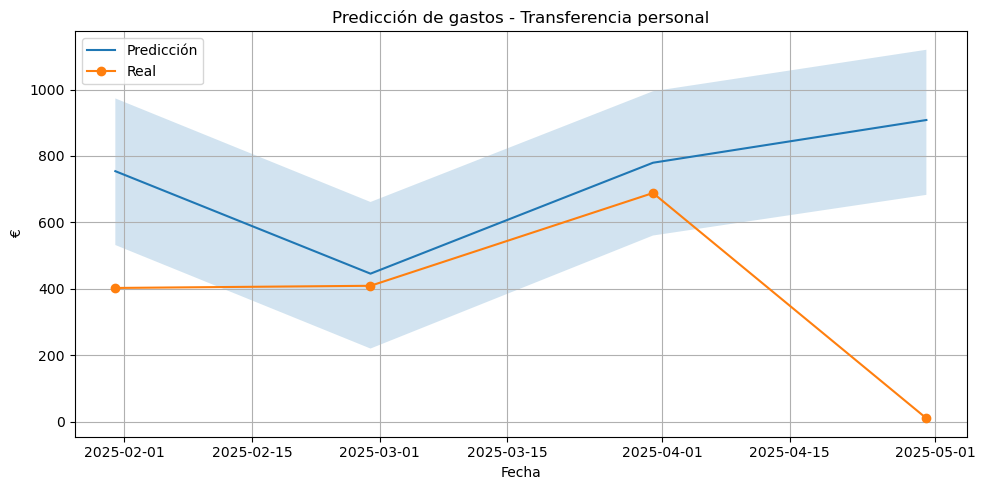

17:33:22 - cmdstanpy - INFO - Chain [1] start processing



 -- Categoría: Compras no esenciales --


17:33:22 - cmdstanpy - INFO - Chain [1] done processing


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-31,214.76 €,49.19 €,376.83 €,67.33 €
1,2025-02-28,209.73 €,45.60 €,380.09 €,55.99 €
2,2025-03-31,380.46 €,212.66 €,550.86 €,52.89 €
3,2025-04-30,344.28 €,179.21 €,512.71 €,184.63 €


✅ MAE Prophet para 'Compras no esenciales': 197.10 €


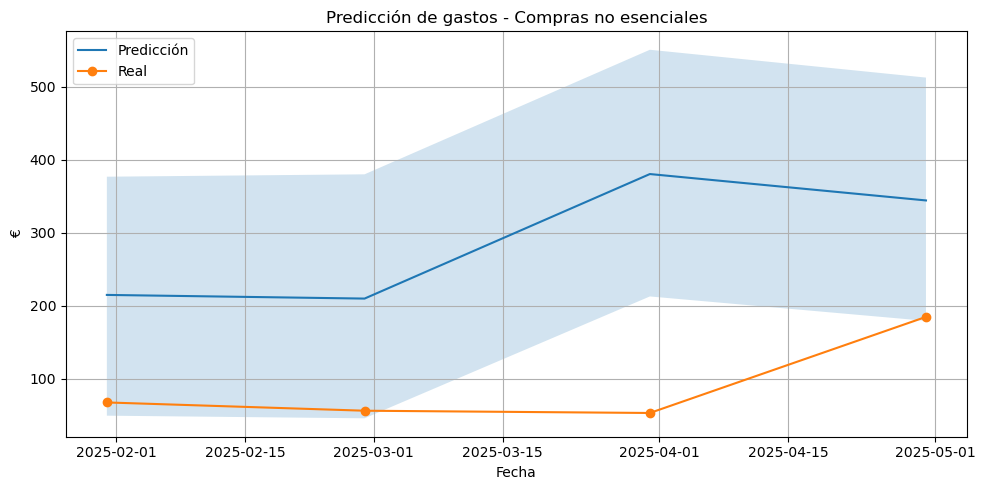

17:33:22 - cmdstanpy - INFO - Chain [1] start processing



 -- Categoría: Facturas --


17:33:23 - cmdstanpy - INFO - Chain [1] done processing


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-31,220.77 €,122.49 €,319.16 €,647.59 €
1,2025-02-28,158.94 €,62.16 €,251.01 €,671.20 €
2,2025-03-31,274.08 €,168.54 €,383.09 €,510.98 €
3,2025-04-30,865.04 €,765.78 €,966.00 €,510.98 €


✅ MAE Prophet para 'Facturas': 382.51 €


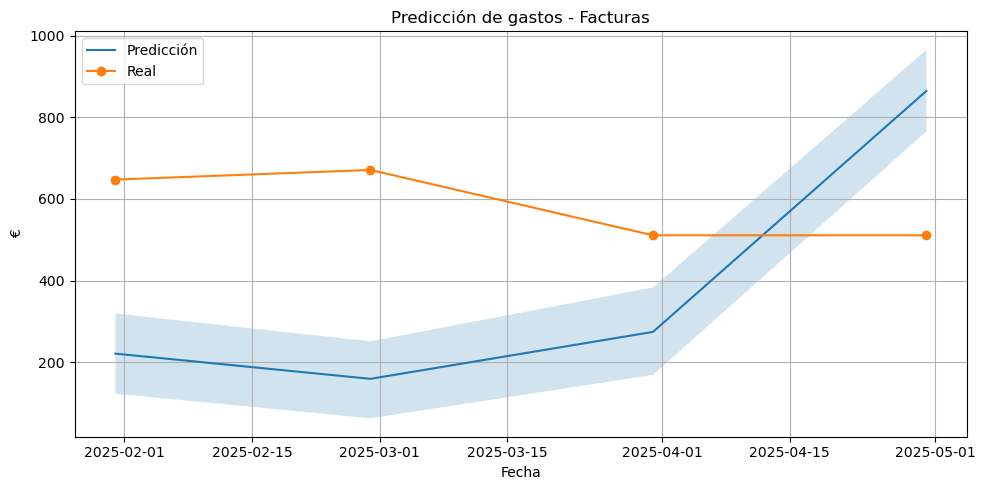

17:33:23 - cmdstanpy - INFO - Chain [1] start processing



 -- Categoría: Préstamo --


17:33:23 - cmdstanpy - INFO - Chain [1] done processing


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-31,41.20 €,-3.75 €,84.59 €,197.19 €
1,2025-02-28,41.32 €,-2.92 €,83.76 €,197.19 €
2,2025-03-31,13.13 €,-29.97 €,58.30 €,0.00 €
3,2025-04-30,0.13 €,-42.99 €,40.67 €,197.19 €


✅ MAE Prophet para 'Préstamo': 130.51 €


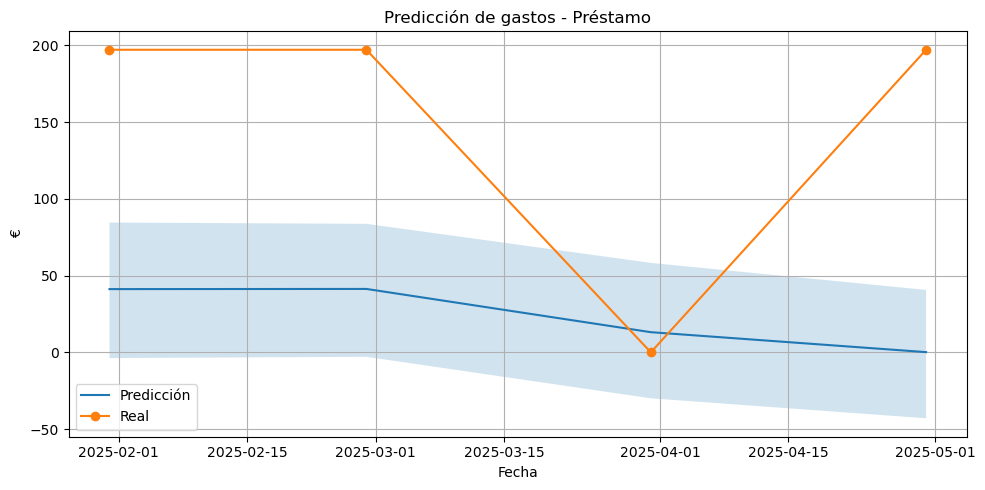

17:33:24 - cmdstanpy - INFO - Chain [1] start processing



 -- Categoría: Ocio / Suscripciones --


17:33:24 - cmdstanpy - INFO - Chain [1] done processing


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-31,128.27 €,72.17 €,181.12 €,62.95 €
1,2025-02-28,52.79 €,-4.16 €,108.13 €,52.96 €
2,2025-03-31,232.43 €,175.99 €,288.96 €,52.96 €
3,2025-04-30,216.32 €,155.17 €,274.51 €,19.47 €


✅ MAE Prophet para 'Ocio / Suscripciones': 110.45 €


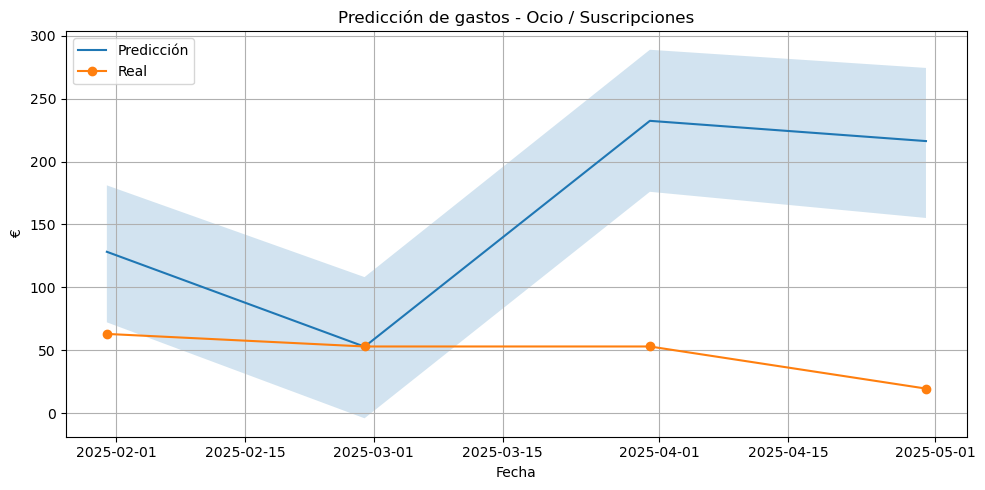

17:33:24 - cmdstanpy - INFO - Chain [1] start processing



 -- Categoría: Restauración --


17:33:24 - cmdstanpy - INFO - Chain [1] done processing


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-31,427.81 €,319.50 €,531.29 €,110.58 €
1,2025-02-28,290.81 €,190.30 €,393.06 €,185.12 €
2,2025-03-31,248.55 €,145.46 €,359.14 €,241.40 €
3,2025-04-30,529.29 €,431.11 €,643.98 €,130.52 €


✅ MAE Prophet para 'Restauración': 207.21 €


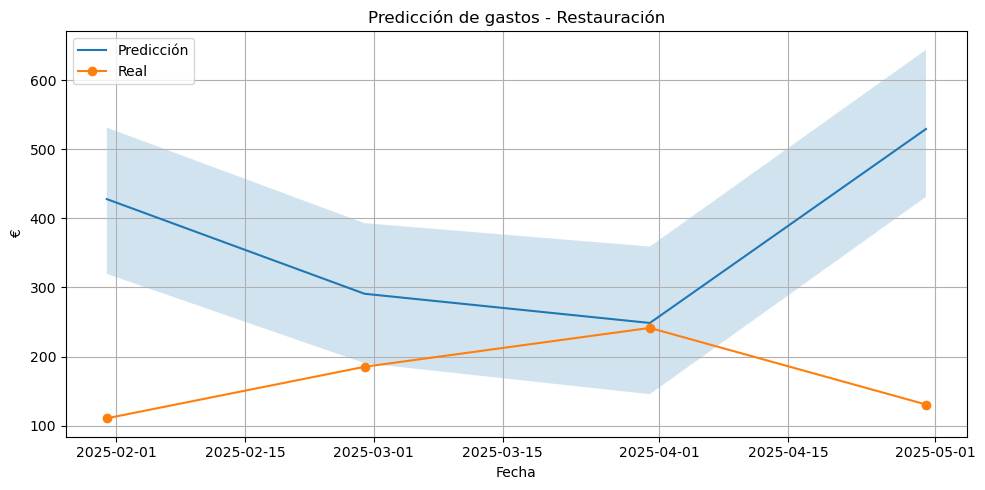

17:33:25 - cmdstanpy - INFO - Chain [1] start processing



 -- Categoría: Supermercado --


17:33:25 - cmdstanpy - INFO - Chain [1] done processing


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-31,363.72 €,270.41 €,456.78 €,370.80 €
1,2025-02-28,355.63 €,261.71 €,449.76 €,249.23 €
2,2025-03-31,481.98 €,393.00 €,573.20 €,321.33 €
3,2025-04-30,753.84 €,658.91 €,843.93 €,294.30 €


✅ MAE Prophet para 'Supermercado': 183.42 €


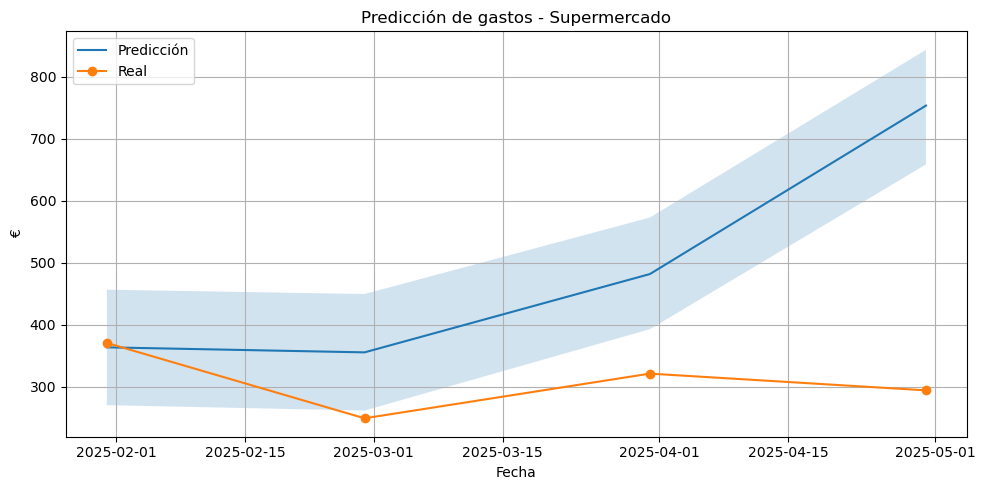

17:33:25 - cmdstanpy - INFO - Chain [1] start processing



 -- Categoría: Transporte --


17:33:26 - cmdstanpy - INFO - Chain [1] done processing


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-31,112.81 €,64.20 €,162.78 €,33.25 €
1,2025-02-28,157.40 €,105.69 €,207.56 €,74.14 €
2,2025-03-31,28.78 €,-16.69 €,78.24 €,60.00 €
3,2025-04-30,154.67 €,107.63 €,202.21 €,36.25 €


✅ MAE Prophet para 'Transporte': 78.11 €


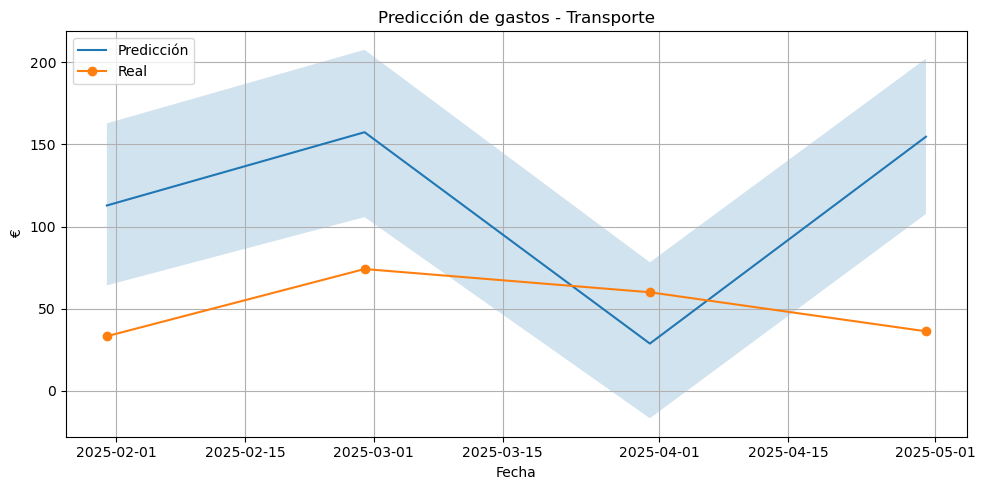

In [40]:
def predecir_categoria_con_prophet(nombre_categoria):
    # 1. Preparar los datos
    df_prophet = gastos_mensuales[nombre_categoria].reset_index()
    df_prophet.columns = ['ds', 'y']
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
    df_prophet['y'] = df_prophet['y'].abs()  # asegurar valores positivos

    print(f"\n -- Categoría: {nombre_categoria} --")

    # 2. Eliminar valores atípicos
    q95 = df_prophet['y'].quantile(0.95)
    df_prophet['y'] = df_prophet['y'].clip(upper=q95)

    # 3. Separar valores reales para comparar luego
    reales = df_prophet[df_prophet['ds'] > '2024-12-31'][['ds', 'y']]
    reales['ds'] = reales['ds'] + pd.offsets.MonthEnd(0)  # alinear fechas

    # 4. Entrenamiento hasta diciembre 2024
    df_entrenamiento = df_prophet[df_prophet['ds'] <= '2024-12-31'].copy()

    # 5. Crear modelo Prophet mejorado
    modelo_prophet = Prophet(
        changepoint_prior_scale=0.03,     # menos sobreajuste
        seasonality_mode='additive',      # más estable
        interval_width=0.90
    )
    modelo_prophet.fit(df_entrenamiento)

    # 6. Generar fechas futuras y predecir
    futuro = modelo_prophet.make_future_dataframe(periods=5, freq='ME')
    forecast = modelo_prophet.predict(futuro)

    # 7. Comparar con valores reales
    forecast_test = forecast[forecast['ds'] > '2024-12-31'][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    comparacion = pd.merge(forecast_test, reales, on='ds', how='left')
    comparacion = comparacion.rename(columns={
        'ds': 'Fecha',
        'yhat': 'Predicción (€)',
        'yhat_lower': 'Límite inferior (€)',
        'yhat_upper': 'Límite superior (€)',
        'y': 'Real (€)'
    })

    # 8. Mostrar tabla de resultados
    pd.set_option('display.float_format', '{:,.2f} €'.format)
    display(comparacion)

    # 9. Calcular error MAE
    if 'Real (€)' in comparacion.columns:
        mae = mean_absolute_error(comparacion['Real (€)'], comparacion['Predicción (€)'])
        print(f"✅ MAE Prophet para '{nombre_categoria}': {mae:.2f} €")

    # 10. Visualización
    plt.figure(figsize=(10, 5))
    plt.plot(comparacion['Fecha'], comparacion['Predicción (€)'], label='Predicción')
    plt.fill_between(comparacion['Fecha'], comparacion['Límite inferior (€)'], comparacion['Límite superior (€)'], alpha=0.2)
    plt.plot(comparacion['Fecha'], comparacion['Real (€)'], marker='o', label='Real')
    plt.title(f"Predicción de gastos - {nombre_categoria}")
    plt.xlabel("Fecha")
    plt.ylabel("€")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

predecir_categoria_con_prophet('Transferencia personal')
predecir_categoria_con_prophet('Compras no esenciales')
predecir_categoria_con_prophet('Facturas')
predecir_categoria_con_prophet('Préstamo')
predecir_categoria_con_prophet('Ocio / Suscripciones')
predecir_categoria_con_prophet('Restauración')
predecir_categoria_con_prophet('Supermercado')
predecir_categoria_con_prophet('Transporte')

17:37:39 - cmdstanpy - INFO - Chain [1] start processing
17:37:39 - cmdstanpy - INFO - Chain [1] done processing


Entrenando Prophet para la categoría: Supermercado


17:37:39 - cmdstanpy - INFO - Chain [1] start processing
17:37:39 - cmdstanpy - INFO - Chain [1] done processing
17:37:39 - cmdstanpy - INFO - Chain [1] start processing
17:37:39 - cmdstanpy - INFO - Chain [1] done processing
17:37:40 - cmdstanpy - INFO - Chain [1] start processing
17:37:40 - cmdstanpy - INFO - Chain [1] done processing
17:37:40 - cmdstanpy - INFO - Chain [1] start processing
17:37:40 - cmdstanpy - INFO - Chain [1] done processing
17:37:40 - cmdstanpy - INFO - Chain [1] start processing
17:37:40 - cmdstanpy - INFO - Chain [1] done processing
17:37:40 - cmdstanpy - INFO - Chain [1] start processing
17:37:40 - cmdstanpy - INFO - Chain [1] done processing
17:37:41 - cmdstanpy - INFO - Chain [1] start processing
17:37:41 - cmdstanpy - INFO - Chain [1] done processing
17:37:41 - cmdstanpy - INFO - Chain [1] start processing
17:37:41 - cmdstanpy - INFO - Chain [1] done processing
17:37:41 - cmdstanpy - INFO - Chain [1] start processing
17:37:41 - cmdstanpy - INFO - Chain [1]

Mejores hiperparámetros para Supermercado: {'changepoint_prior_scale': 0.0185, 'seasonality_mode': 'additive'} con RMSE 146.90618221619835


17:37:48 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


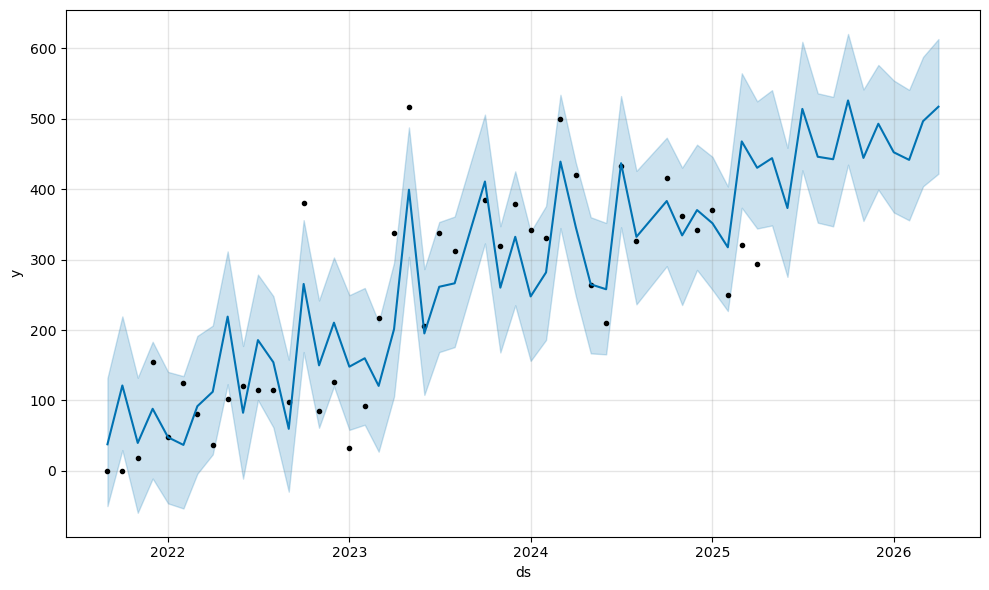

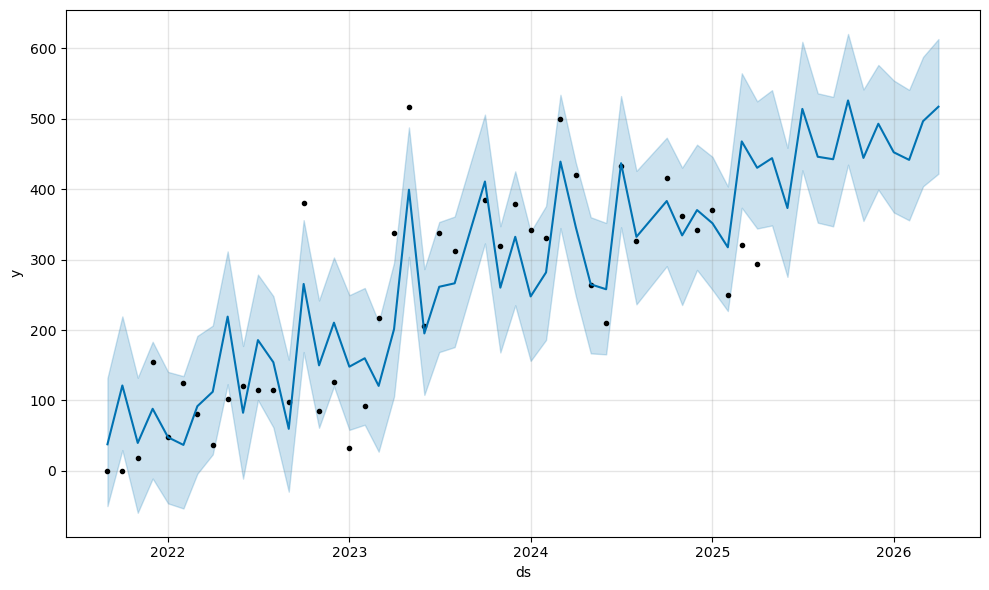

In [45]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import itertools
import pandas as pd

# Asegúrate de tener un DataFrame llamado 'gastos_mensuales' con índice datetime
# y columnas por categoría. Ejemplo:
# gastos_mensuales = df_plot.pivot_table(index='fecha', columns='categoria', values='importe', aggfunc='sum')

def forecast_accuracy(y_pred, y_true):
    mae = np.mean(np.abs(y_pred - y_true))
    rmse = np.sqrt(np.mean((y_pred - y_true) ** 2))
    return {"MAE": mae, "RMSE": rmse}

def entrenar_prophet_categoria(df_categoria, categoria, grid_params, n_splits=3):
    print(f"Entrenando Prophet para la categoría: {categoria}")
    df_categoria = df_categoria.dropna().copy()
    df_categoria["ds"] = df_categoria.index
    df_categoria = df_categoria.rename(columns={categoria: "y"})
    df_categoria["ds"] = pd.to_datetime(df_categoria["ds"])

    # Validación cruzada temporal
    tscv = TimeSeriesSplit(n_splits=n_splits)
    mejor_rmse = float("inf")
    mejor_params = None

    for params in grid_params:
        errores = []

        for train_idx, test_idx in tscv.split(df_categoria):
            df_train, df_test = df_categoria.iloc[train_idx], df_categoria.iloc[test_idx]
            modelo = Prophet(
                changepoint_prior_scale=params["changepoint_prior_scale"],
                seasonality_mode=params["seasonality_mode"]
            )
            modelo.fit(df_train)
            future = modelo.make_future_dataframe(periods=len(df_test), freq="MS")
            pred = modelo.predict(future)
            pred_test = pred.iloc[-len(df_test):]["yhat"].values
            rmse = np.sqrt(mean_squared_error(df_test["y"].values, pred_test))
            errores.append(rmse)

        promedio_rmse = np.mean(errores)
        if promedio_rmse < mejor_rmse:
            mejor_rmse = promedio_rmse
            mejor_params = params

    print(f"Mejores hiperparámetros para {categoria}: {mejor_params} con RMSE {mejor_rmse}")
    
    # Entrenar modelo final con mejores parámetros
    modelo_final = Prophet(
        changepoint_prior_scale=mejor_params["changepoint_prior_scale"],
        seasonality_mode=mejor_params["seasonality_mode"]
    )
    modelo_final.fit(df_categoria)

    # Predecir 12 meses futuros
    futuro = modelo_final.make_future_dataframe(periods=12, freq="MS")
    predicciones = modelo_final.predict(futuro)

    return modelo_final, predicciones

# Hiperparámetros a evaluar
changepoint_vals = [0.01, 0.02, 0.018, 0.0185, 0.02, 0.05]
seasonality_vals = ["additive", "multiplicative"]
grid = [{"changepoint_prior_scale": c, "seasonality_mode": s} for c, s in itertools.product(changepoint_vals, seasonality_vals)]

# Predecir para una categoría (por ejemplo 'Supermercado')
modelo, forecast = entrenar_prophet_categoria(gastos_mensuales[['Supermercado']], 'Supermercado', grid)

# Visualizar resultado
modelo.plot(forecast)


In [46]:
from prophet import Prophet
import pandas as pd
import numpy as np
import itertools
from sklearn.metrics import mean_squared_error
from IPython.display import display

# Hiperparámetros para Prophet
changepoint_vals = [0.01, 0.02, 0.018, 0.0185, 0.02, 0.05]
seasonality_vals = ["additive", "multiplicative"]
grid = [{"changepoint_prior_scale": c, "seasonality_mode": s} for c, s in itertools.product(changepoint_vals, seasonality_vals)]

def entrenar_y_predecir_4_meses(df_categoria, categoria, grid_params):
    # Preparar datos
    df_categoria = df_categoria.dropna().copy()
    df_categoria["ds"] = df_categoria.index
    df_categoria = df_categoria.rename(columns={categoria: "y"})
    df_categoria["ds"] = pd.to_datetime(df_categoria["ds"])
    
    # Entrenar hasta 2024-12-31
    df_entrenamiento = df_categoria[df_categoria["ds"] <= "2024-12-31"]
    
    mejor_rmse = float("inf")
    mejor_params = None

    for params in grid_params:
        try:
            modelo = Prophet(
                changepoint_prior_scale=params["changepoint_prior_scale"],
                seasonality_mode=params["seasonality_mode"]
            )
            modelo.fit(df_entrenamiento)
            future_tmp = modelo.make_future_dataframe(periods=4, freq="MS")
            pred_tmp = modelo.predict(future_tmp)
            rmse = np.sqrt(mean_squared_error(df_entrenamiento["y"], modelo.predict(df_entrenamiento)["yhat"]))
            if rmse < mejor_rmse:
                mejor_rmse = rmse
                mejor_params = params
        except Exception as e:
            print(f"Error con parámetros {params}: {e}")
            continue

    print(f"\n-- Categoría: {categoria} --")
    print(f"Mejores parámetros: {mejor_params}")

    # Modelo final
    modelo_final = Prophet(
        changepoint_prior_scale=mejor_params["changepoint_prior_scale"],
        seasonality_mode=mejor_params["seasonality_mode"]
    )
    modelo_final.fit(df_entrenamiento)
    
    # Predecir 4 meses futuros
    future = modelo_final.make_future_dataframe(periods=4, freq="MS")
    pred = modelo_final.predict(future)

    fechas_deseadas = pd.date_range(start="2025-01-01", periods=4, freq="MS")
    pred_filtrado = pred[pred["ds"].isin(fechas_deseadas)][["ds", "yhat", "yhat_lower", "yhat_upper"]].copy()
    pred_filtrado.columns = ["Fecha", "Predicción (€)", "Límite inferior (€)", "Límite superior (€)"]
    
    # Añadir valores reales si existen
    reales = df_categoria[df_categoria["ds"].isin(fechas_deseadas)][["ds", "y"]].rename(columns={"ds": "Fecha", "y": "Real (€)"})
    resultado = pred_filtrado.merge(reales, on="Fecha", how="left")

    # Formateo visual
    resultado[["Predicción (€)", "Límite inferior (€)", "Límite superior (€)", "Real (€)"]] = \
        resultado[["Predicción (€)", "Límite inferior (€)", "Límite superior (€)", "Real (€)"]].round(2)
    
    for col in ["Predicción (€)", "Límite inferior (€)", "Límite superior (€)", "Real (€)"]:
        resultado[col] = resultado[col].apply(lambda x: f"{x:.2f} €" if pd.notnull(x) else "-")

    display(resultado)

# USO:
# Asegúrate de tener este DataFrame: `gastos_mensuales` con columnas por categoría
# Ejemplo de llamada:
entrenar_y_predecir_4_meses(gastos_mensuales[['Supermercado']], 'Supermercado', grid)


17:46:15 - cmdstanpy - INFO - Chain [1] start processing
17:46:15 - cmdstanpy - INFO - Chain [1] done processing
17:46:15 - cmdstanpy - INFO - Chain [1] start processing
17:46:15 - cmdstanpy - INFO - Chain [1] done processing
17:46:16 - cmdstanpy - INFO - Chain [1] start processing
17:46:16 - cmdstanpy - INFO - Chain [1] done processing
17:46:16 - cmdstanpy - INFO - Chain [1] start processing
17:46:16 - cmdstanpy - INFO - Chain [1] done processing
17:46:16 - cmdstanpy - INFO - Chain [1] start processing
17:46:17 - cmdstanpy - INFO - Chain [1] done processing
17:46:17 - cmdstanpy - INFO - Chain [1] start processing
17:46:17 - cmdstanpy - INFO - Chain [1] done processing
17:46:17 - cmdstanpy - INFO - Chain [1] start processing
17:46:17 - cmdstanpy - INFO - Chain [1] done processing
17:46:18 - cmdstanpy - INFO - Chain [1] start processing
17:46:18 - cmdstanpy - INFO - Chain [1] done processing
17:46:18 - cmdstanpy - INFO - Chain [1] start processing
17:46:18 - cmdstanpy - INFO - Chain [1]


-- Categoría: Supermercado --
Mejores parámetros: {'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'}


17:46:20 - cmdstanpy - INFO - Chain [1] done processing


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-01,-24.47 €,-95.40 €,49.23 €,370.80 €
1,2025-02-01,742.66 €,669.09 €,811.83 €,249.23 €
2,2025-03-01,609.98 €,541.35 €,682.26 €,321.33 €
3,2025-04-01,594.69 €,521.90 €,661.82 €,294.30 €


17:49:49 - cmdstanpy - INFO - Chain [1] start processing
17:49:49 - cmdstanpy - INFO - Chain [1] done processing
17:49:50 - cmdstanpy - INFO - Chain [1] start processing
17:49:50 - cmdstanpy - INFO - Chain [1] done processing
17:49:50 - cmdstanpy - INFO - Chain [1] start processing
17:49:50 - cmdstanpy - INFO - Chain [1] done processing
17:49:50 - cmdstanpy - INFO - Chain [1] start processing
17:49:51 - cmdstanpy - INFO - Chain [1] done processing
17:49:51 - cmdstanpy - INFO - Chain [1] start processing
17:49:51 - cmdstanpy - INFO - Chain [1] done processing
17:49:51 - cmdstanpy - INFO - Chain [1] start processing
17:49:51 - cmdstanpy - INFO - Chain [1] done processing
17:49:52 - cmdstanpy - INFO - Chain [1] start processing
17:49:52 - cmdstanpy - INFO - Chain [1] done processing
17:49:52 - cmdstanpy - INFO - Chain [1] start processing
17:49:52 - cmdstanpy - INFO - Chain [1] done processing
17:49:52 - cmdstanpy - INFO - Chain [1] start processing
17:49:53 - cmdstanpy - INFO - Chain [1]


-- Categoría: Supermercado --
Mejores parámetros: {'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'}


17:49:54 - cmdstanpy - INFO - Chain [1] done processing


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-01,-24.47 €,-98.71 €,49.62 €,370.80 €
1,2025-02-01,742.66 €,670.77 €,809.19 €,249.23 €
2,2025-03-01,609.98 €,541.87 €,681.19 €,321.33 €
3,2025-04-01,594.69 €,525.61 €,664.59 €,294.30 €


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


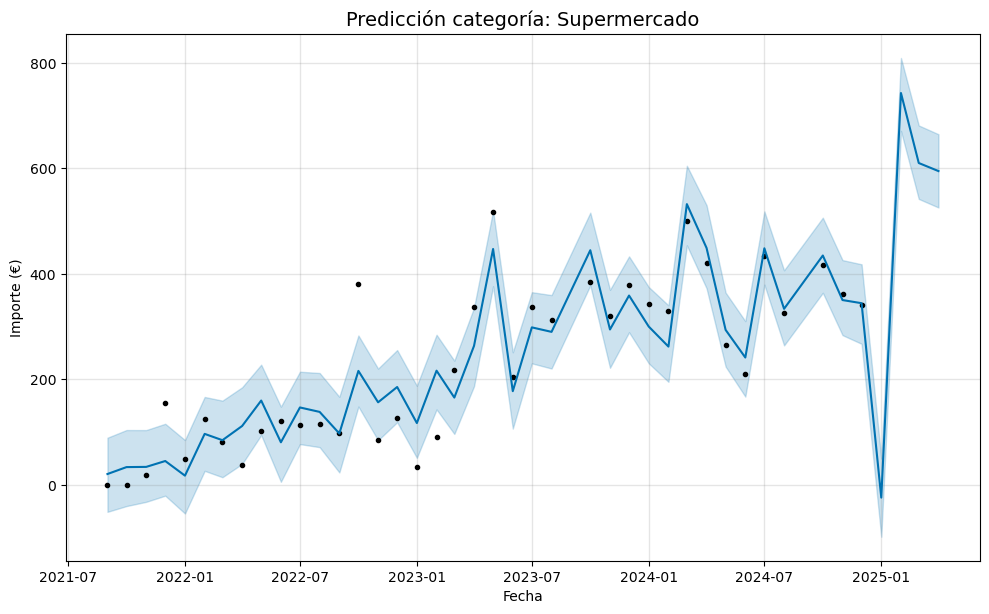

In [48]:
from prophet import Prophet
import pandas as pd
import numpy as np
import itertools
from sklearn.metrics import mean_squared_error
from IPython.display import display
import matplotlib.pyplot as plt

# Hiperparámetros
changepoint_vals = [0.01, 0.02, 0.018, 0.0185, 0.02, 0.05]
seasonality_vals = ["additive", "multiplicative"]
grid = [{"changepoint_prior_scale": c, "seasonality_mode": s} for c, s in itertools.product(changepoint_vals, seasonality_vals)]

def entrenar_y_predecir_4_meses(df_categoria, categoria, grid_params):
    df_categoria = df_categoria.dropna().copy()
    df_categoria["ds"] = df_categoria.index
    df_categoria = df_categoria.rename(columns={categoria: "y"})
    df_categoria["ds"] = pd.to_datetime(df_categoria["ds"])
    
    # Entrenar hasta diciembre 2024
    df_entrenamiento = df_categoria[df_categoria["ds"] <= "2024-12-31"]
    
    mejor_rmse = float("inf")
    mejor_params = None

    for params in grid_params:
        try:
            modelo = Prophet(
                changepoint_prior_scale=params["changepoint_prior_scale"],
                seasonality_mode=params["seasonality_mode"]
            )
            modelo.fit(df_entrenamiento)
            future_tmp = modelo.make_future_dataframe(periods=4, freq="MS")
            pred_tmp = modelo.predict(future_tmp)
            rmse = np.sqrt(mean_squared_error(df_entrenamiento["y"], modelo.predict(df_entrenamiento)["yhat"]))
            if rmse < mejor_rmse:
                mejor_rmse = rmse
                mejor_params = params
        except Exception as e:
            print(f"Error con parámetros {params}: {e}")
            continue

    print(f"\n-- Categoría: {categoria} --")
    print(f"Mejores parámetros: {mejor_params}")

    # Modelo final
    modelo_final = Prophet(
        changepoint_prior_scale=mejor_params["changepoint_prior_scale"],
        seasonality_mode=mejor_params["seasonality_mode"]
    )
    modelo_final.fit(df_entrenamiento)

    # Predicción futura
    future = modelo_final.make_future_dataframe(periods=4, freq="MS")
    pred = modelo_final.predict(future)

    fechas_deseadas = pd.date_range(start="2025-01-01", periods=4, freq="MS")
    pred_filtrado = pred[pred["ds"].isin(fechas_deseadas)][["ds", "yhat", "yhat_lower", "yhat_upper"]].copy()
    pred_filtrado.columns = ["Fecha", "Predicción (€)", "Límite inferior (€)", "Límite superior (€)"]
    
    # Valores reales si existen
    reales = df_categoria[df_categoria["ds"].isin(fechas_deseadas)][["ds", "y"]].rename(columns={"ds": "Fecha", "y": "Real (€)"})
    resultado = pred_filtrado.merge(reales, on="Fecha", how="left")

    # Formato tabla
    resultado[["Predicción (€)", "Límite inferior (€)", "Límite superior (€)", "Real (€)"]] = \
        resultado[["Predicción (€)", "Límite inferior (€)", "Límite superior (€)", "Real (€)"]].round(2)
    
    for col in ["Predicción (€)", "Límite inferior (€)", "Límite superior (€)", "Real (€)"]:
        resultado[col] = resultado[col].apply(lambda x: f"{x:.2f} €" if pd.notnull(x) else "-")

    display(resultado)

    # 🔵 Gráfico de Prophet
    fig = modelo_final.plot(pred)
    plt.title(f"Predicción categoría: {categoria}", fontsize=14)
    plt.xlabel("Fecha")
    plt.ylabel("Importe (€)")
    plt.show()

# USO
entrenar_y_predecir_4_meses(gastos_mensuales[['Supermercado']], 'Supermercado', grid)
